In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import chi2_contingency

In [2]:
path = os.getcwd()
data = path + '/dataset/bank/bank-additional/bank-additional-full.csv'
df = pd.read_csv(data, sep=';')
print(f'size of the data --> {df.shape}')
df.head()

size of the data --> (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# create table listing column types etc
df_info = pd.DataFrame([df.columns,df.dtypes, df.isna().sum(), df.nunique()])
df_info = df_info.T
df_info.columns = ['column','dtype','NA_count', 'unique_count']
print(f'check for duplicates --> {df.duplicated().sum()}')
# drop duplicates, 12 rows
df = df.drop_duplicates()
df_copy = df.copy()
df_info

check for duplicates --> 12


,column,dtype,NA_count,unique_count
0,age,int64,0,78
1,job,object,0,12
2,marital,object,0,4
3,education,object,0,8
4,default,object,0,3
5,housing,object,0,3
6,loan,object,0,3
7,contact,object,0,2
8,month,object,0,10
9,day_of_week,object,0,5


## Feature description

# Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')
Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Term Deposits


A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.

# Categorical Data

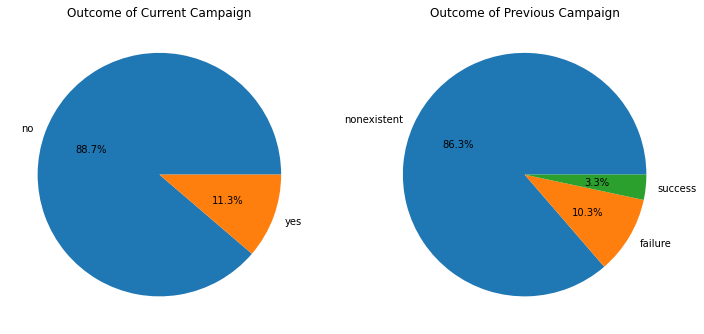

In [4]:
'''pie chart for response variable'''
# calculate the percentage of each class
y_counts = df['y'].value_counts()
p_counts = df['poutcome'].value_counts()
y_percentages = [100*(count/sum(y_counts)) for count in y_counts]
p_percentages = [100*(count/sum(p_counts)) for count in p_counts]

# add percentages to pie chart
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].pie(y_percentages, labels=y_counts.index, autopct='%1.1f%%')
ax[0].set_title('Outcome of Current Campaign')
ax[1].pie(p_percentages, labels=p_counts.index, autopct='%1.1f%%')
ax[1].set_title('Outcome of Previous Campaign')
plt.show()

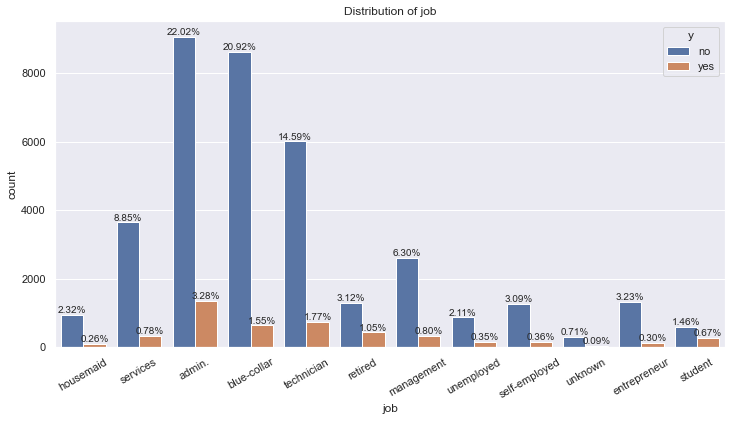

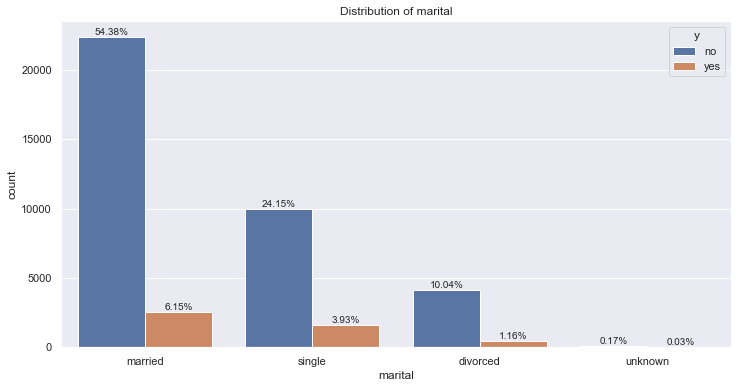

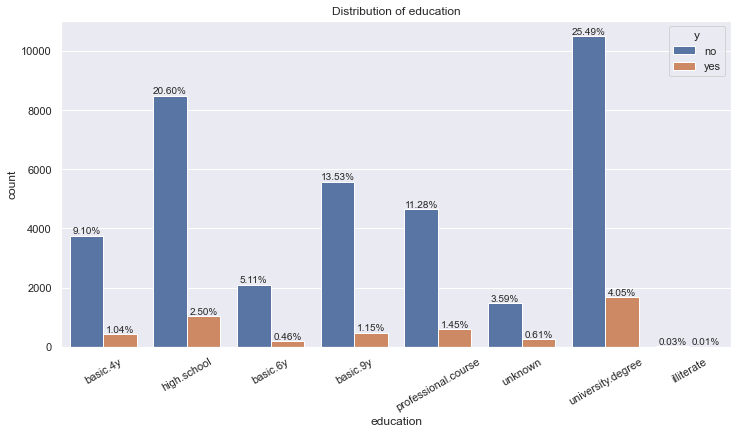

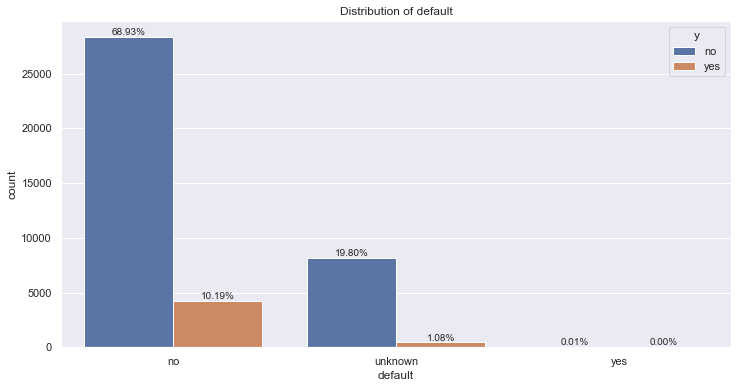

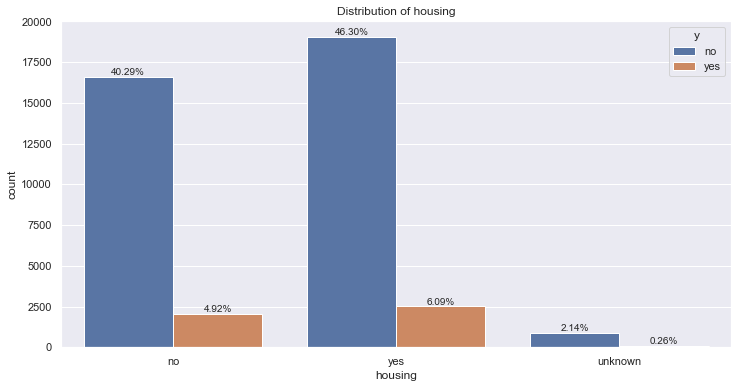

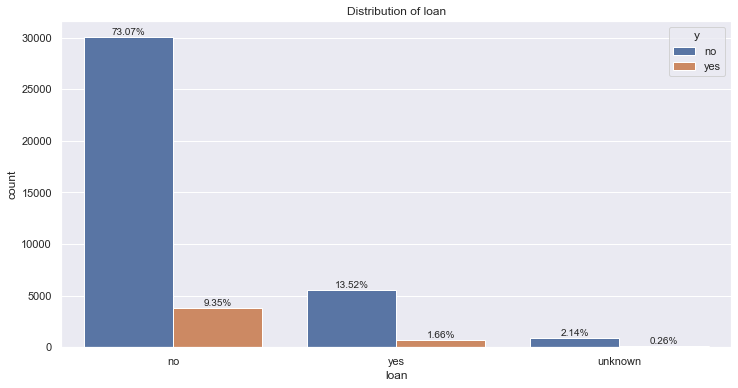

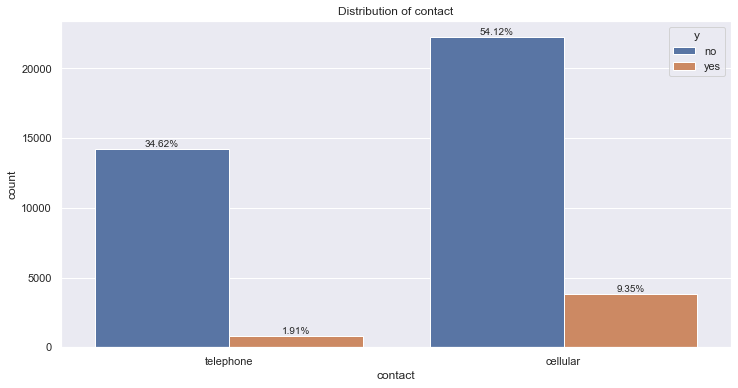

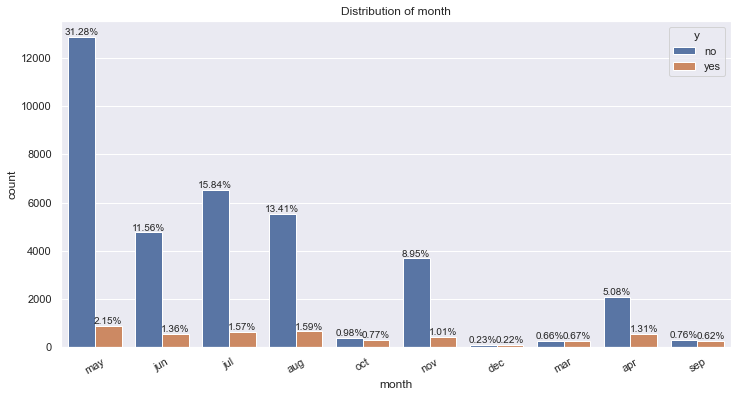

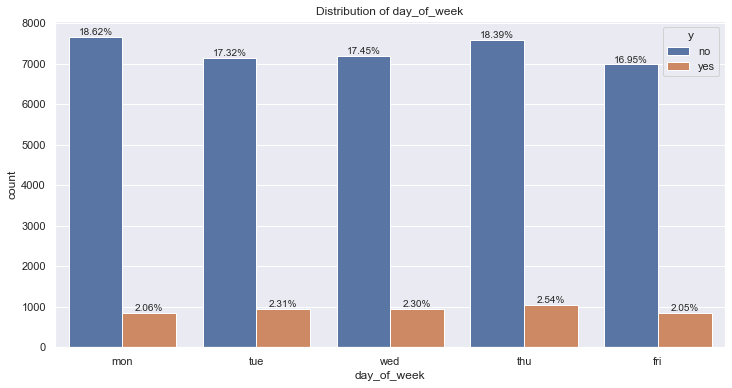

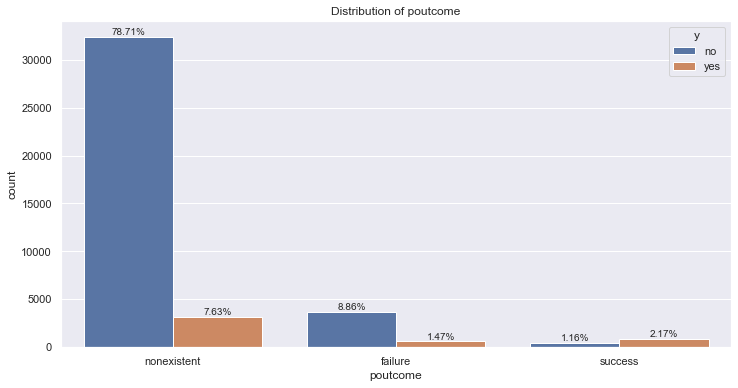

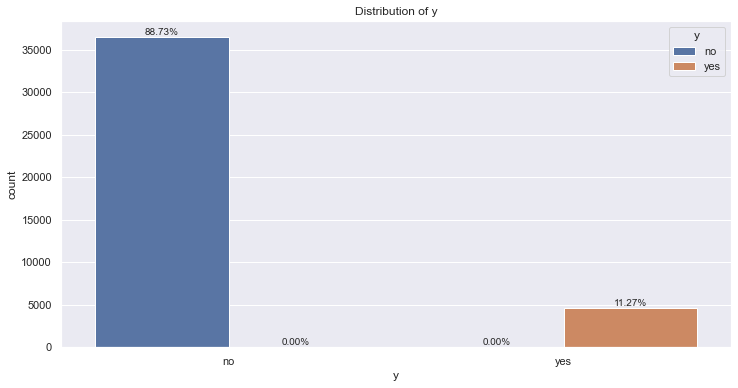

In [5]:
'''plot bar chart for categorical variables'''
df_cat = df.select_dtypes(include='object')
for col in df_cat.columns:
    sns.set(rc={'figure.figsize':(12,6)})
    plt.figure(figsize=(12,6)) # set figure size
    ax = sns.countplot(data=df_cat, x=str(col), hue='y')
    ax.set_title('Distribution of {}'.format(col))
    # Add bar labels using ax.bar_label
    total = len(df_cat[str(col)])
    for p in ax.containers:
        percentages = [f'{(h.get_height()/total)*100:.2f}%' for h in p]
        ax.bar_label(p, labels=percentages, label_type='edge', fontsize=10)
    if len(df[col].unique()) > 5:       # rotate ticks to avoid overlapping
        plt.xticks(rotation=30)
    plt.show()

In [6]:
# '''plot bar chart for categorical variables'''
# df_cat = df.select_dtypes(include='object')
# for col in df_cat.columns:
#     sns.set(rc={'figure.figsize':(12,6)})
#     plt.figure(figsize=(12,6)) # set figure size
#     ax = sns.countplot(data=df_cat, x=str(col), hue='y')
#     ax.set_title('Distribution of {}'.format(col))
#     # Add bar labels using ax.bar_label
#     for p in ax.containers:
#         ax.bar_label(p, label_type='edge', fontsize=10)
#     if len(df[col].unique()) > 5:       # rotate ticks to avoid overlapping
#         plt.xticks(rotation=30)
#     plt.show()

### Job and Education

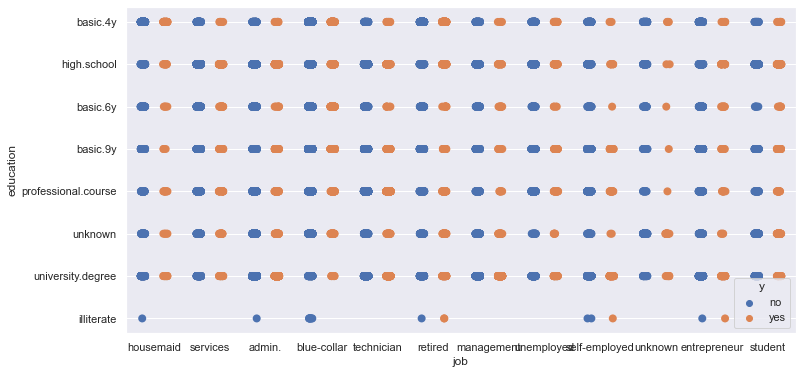

In [7]:
sns.stripplot(data=df, x='job', y='education', hue='y', dodge=True, jitter=0.08, size=8)
plt.show()

### Check for monthly trends

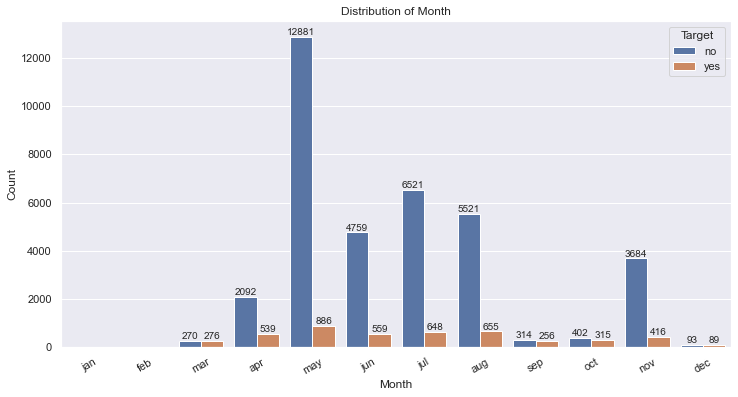

In [8]:
'''months sorted'''
# Convert month column to categorical type and specify order of categories
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

# Plot stacked bar chart for month column
sns.set(rc={'figure.figsize':(12,6)})
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='month', hue='y')
ax.set_title('Distribution of Month')
ax.set_xlabel('Month')
ax.set_ylabel('Count')
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10)
plt.xticks(rotation=30)
plt.legend(title='Target', loc='upper right')
plt.show()

### Marital

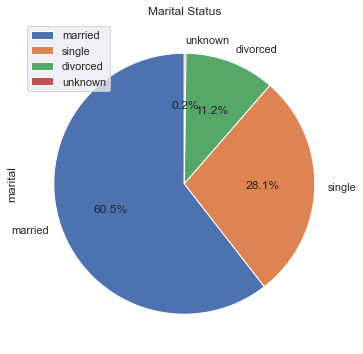

In [9]:
marital_counts = df['marital'].value_counts()
marital_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
# plt.axis('equal')
plt.title('Marital Status')
plt.legend()
plt.show()

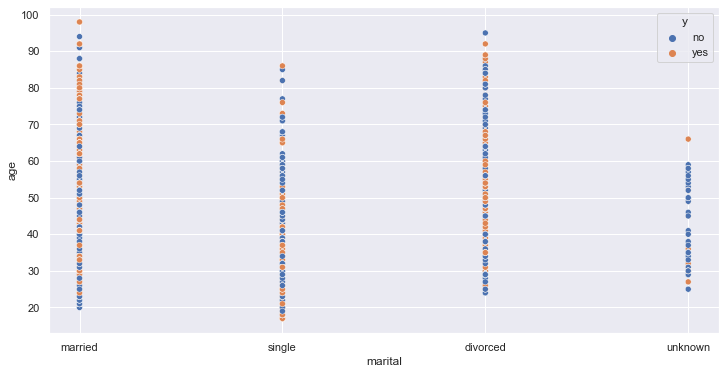

In [10]:
sns.scatterplot(data=df, x='marital', y='age', hue = 'y')
plt.show()

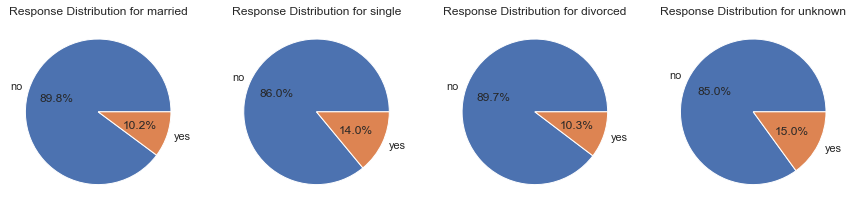

In [11]:
marital_categories = df['marital'].unique()

fig, axs = plt.subplots(1, len(marital_categories), figsize=(15, 5))

for i, category in enumerate(marital_categories):
    data = df[df['marital']==category]['y'].value_counts()
    axs[i].pie(data, labels=data.index, autopct='%1.1f%%')
    axs[i].set_title('Response Distribution for {}'.format(category))

plt.show()


### Age

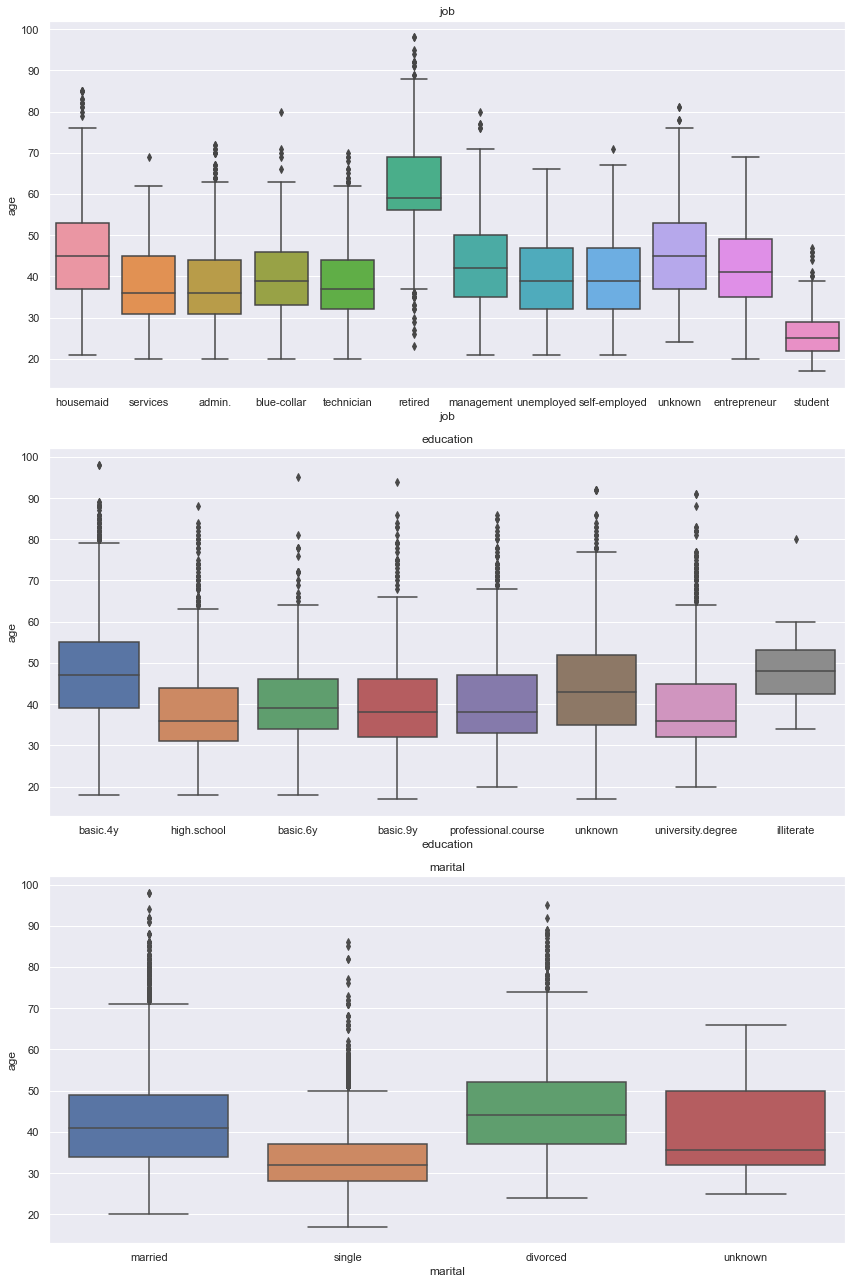

In [12]:
cols = ['job', 'education', 'marital']

fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(12,18))

for i, col in enumerate(cols):
    sns.boxplot(data=df, x=col, y='age', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


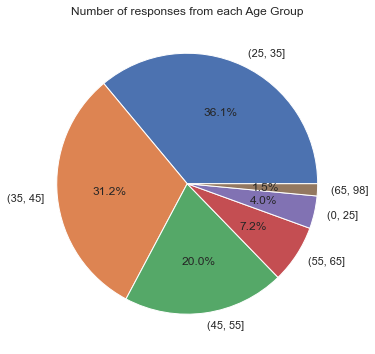

In [13]:
# Create age bins
bins = [0, 25, 35, 45, 55, 65, max(df['age'])]

# Count number of occurrences in each bin for each response
df['age_bins'] = pd.cut(df['age'], bins)
# Count number of occurrences in each age bin
counts = df['age_bins'].value_counts()

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Number of responses from each Age Group')
plt.show()

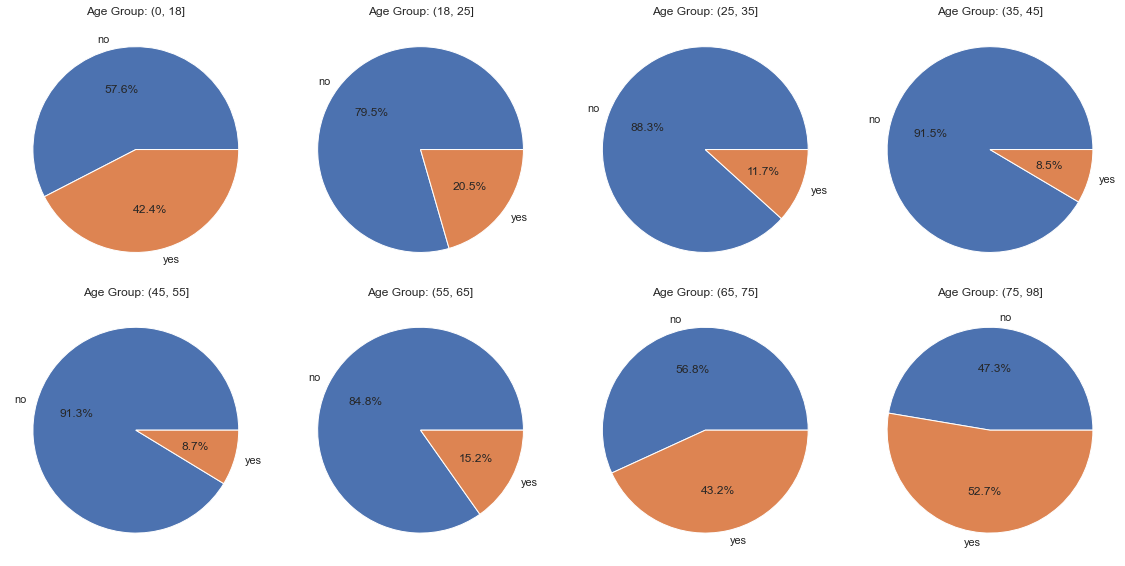

In [14]:
'''response by age group'''
# Create age bins
bins = [0, 18, 25, 35, 45, 55, 65, 75, max(df['age'])]

# Count number of occurrences in each bin for each response
df['age_bins'] = pd.cut(df['age'], bins)
counts = df.groupby(['age_bins', 'y']).size().unstack(fill_value=0)

# Create pie chart for each age bin
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
for i, row in enumerate(counts.iterrows()):
    ax = axs[i // 4][i % 4]
    ax.pie(row[1], labels=row[1].index, autopct='%1.1f%%')
    ax.set_title('Age Group: {}'.format(row[0]))

plt.tight_layout()
plt.show()

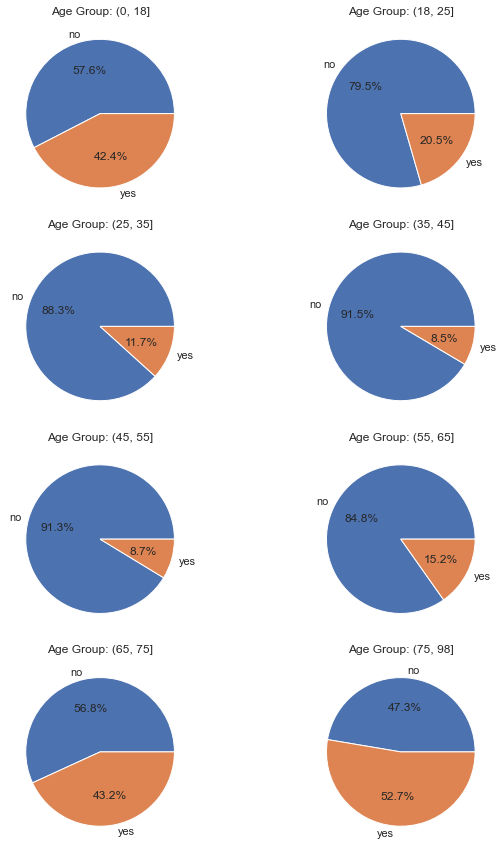

In [15]:
'''response by age group'''
# Create age bins
bins = [0, 18, 25, 35, 45, 55, 65, 75, max(df['age'])]

# Count number of occurrences in each bin for each response
df['age_bins'] = pd.cut(df['age'], bins)
counts = df.groupby(['age_bins', 'y']).size().unstack(fill_value=0)

# Create pie chart for each age bin
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
for i, row in enumerate(counts.iterrows()):
    ax = axs[i // 2][i % 2]
    ax.pie(row[1], labels=row[1].index, autopct='%1.1f%%')
    ax.set_title('Age Group: {}'.format(row[0]))

plt.tight_layout()
plt.show()


In [16]:
default = df['default'].value_counts()
default

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

### Financial

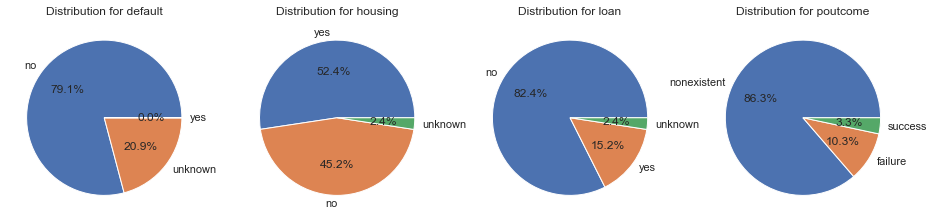

In [17]:
# Create pie charts for each categorical column
cols = ['default', 'housing', 'loan', 'poutcome']
fig, axes = plt.subplots(ncols=len(cols), figsize=(16, 4))
for i, col in enumerate(cols):
    counts = df[col].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%')
    axes[i].set_title('Distribution for {}'.format(col))
plt.show()

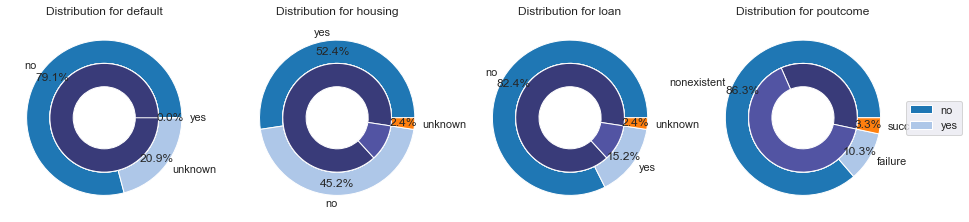

In [18]:

cols = ['default', 'housing', 'loan', 'poutcome']

# Initialize the figure with subplots
fig, axes = plt.subplots(ncols=len(cols), figsize=(16, 4))

# Loop through the columns and create nested pie charts
for i, col in enumerate(cols):
    outer_counts = df[col].value_counts()
    outer_labels = outer_counts.index
    outer_colors = plt.cm.tab20.colors[:len(outer_labels)]
    
    inner_counts = df.groupby(col)['y'].value_counts().unstack(fill_value=0)
    inner_labels = df['y'].unique()
    inner_colors = plt.cm.tab20b.colors[:len(inner_labels)]

    # Outer pie chart
    axes[i].pie(outer_counts, labels=outer_labels, colors=outer_colors, radius=1, autopct='%1.1f%%', pctdistance=0.85, wedgeprops=dict(width=0.3, edgecolor='w'))
    
    # Inner pie chart
    cumulative_angle = 0
    for outer_label, color in zip(outer_labels, outer_colors):
        inner_pie_data = inner_counts.loc[outer_label].tolist()
        start_angle = cumulative_angle
        cumulative_angle += outer_counts.loc[outer_label] * 360 / outer_counts.sum()
        axes[i].pie(inner_pie_data, labels=None, colors=inner_colors, radius=0.7, startangle=start_angle, wedgeprops=dict(width=0.3, edgecolor='w'))
    
    # Set title
    axes[i].set_title('Distribution for {}'.format(col))
    
    # Add legend
    if i == len(cols) - 1:
        axes[i].legend(inner_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


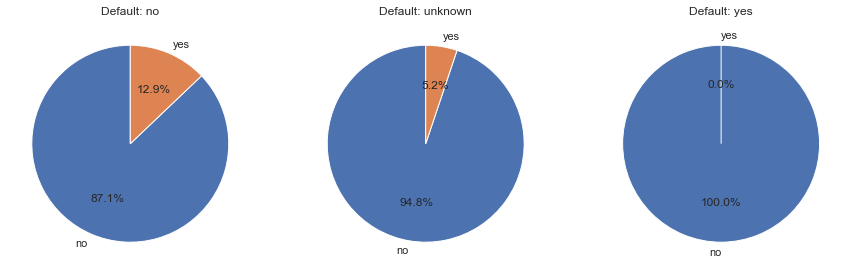

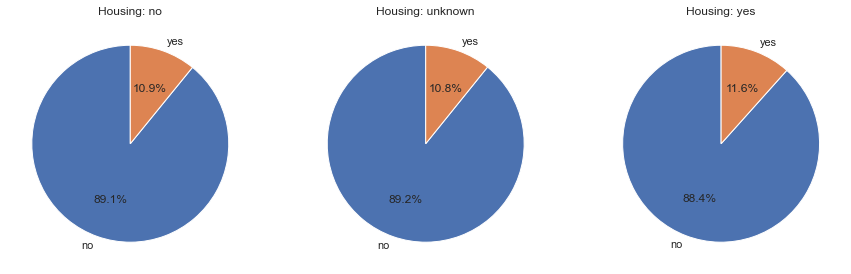

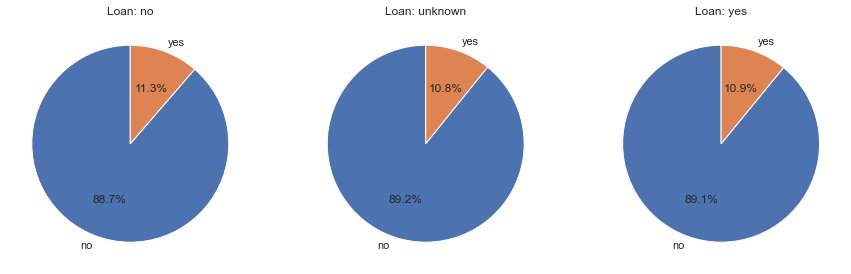

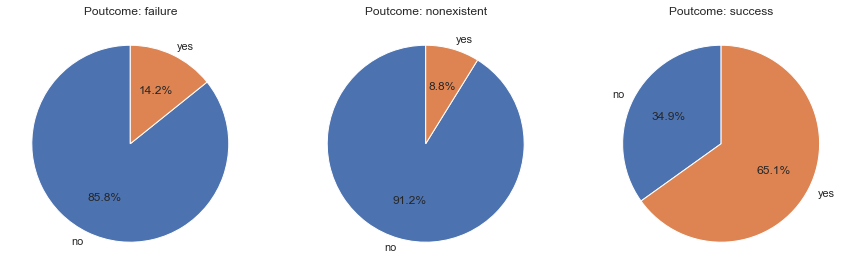

In [19]:
'''Financial Indicators - Client'''

cols = ['default', 'housing', 'loan', 'poutcome']

# Create a function to plot pie charts for each column
def plot_pie_charts(col, df):
    # Calculate the value counts for the column
    col_counts = df[col].value_counts()

    # Calculate the percentages for the 'y' response within each category of the column
    col_y_counts = df.groupby(col)['y'].value_counts().unstack().fillna(0)
    col_y_percents = col_y_counts.div(col_y_counts.sum(axis=1), axis=0) * 100

    # Create pie charts for each category within the column
    n_pies = len(col_counts.index)
    fig, axes = plt.subplots(1, n_pies, figsize=(5 * n_pies, 5))

    for i, (category, percents) in enumerate(col_y_percents.iterrows()):
        ax = axes[i]
        ax.pie(percents, labels=percents.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f"{col.capitalize()}: {category}")

    # Show the plot
    plt.show()

# Plot pie charts for each column in cols
for col in cols:
    plot_pie_charts(col, df)


### Financial Indicators - Economy

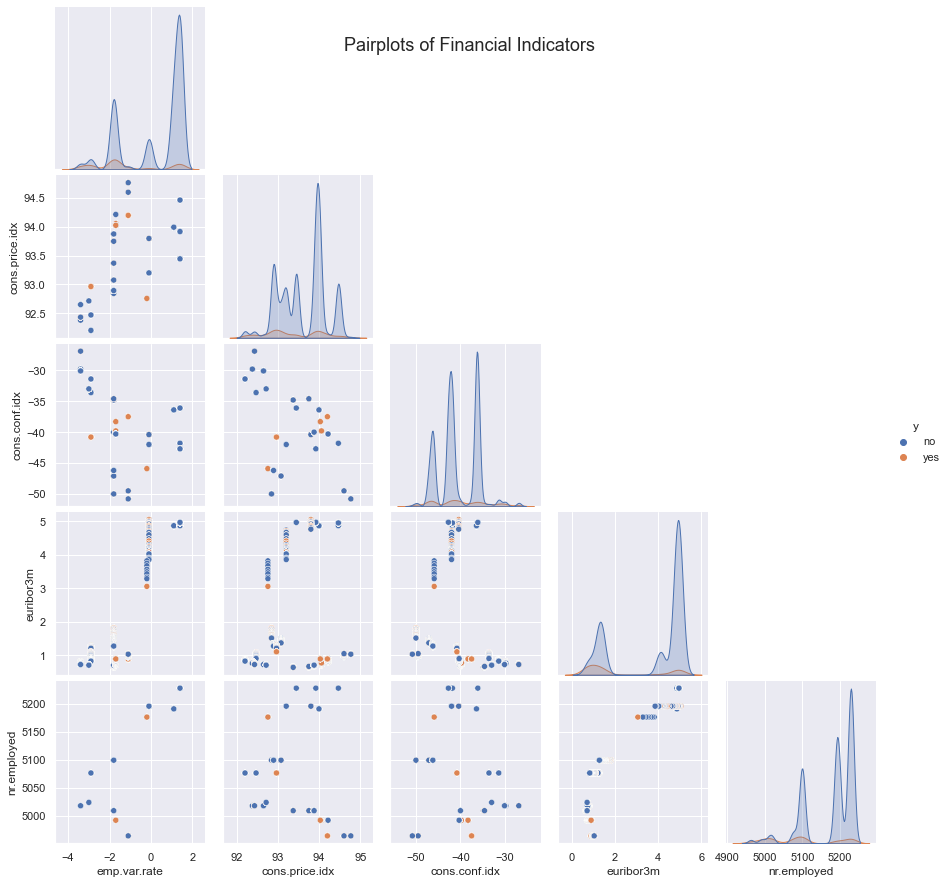

In [57]:
numeric_cols = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
sns.pairplot(df, vars=numeric_cols, hue='y', corner=True)
plt.suptitle("Pairplots of Financial Indicators", fontsize=18, y=0.95)
plt.show()

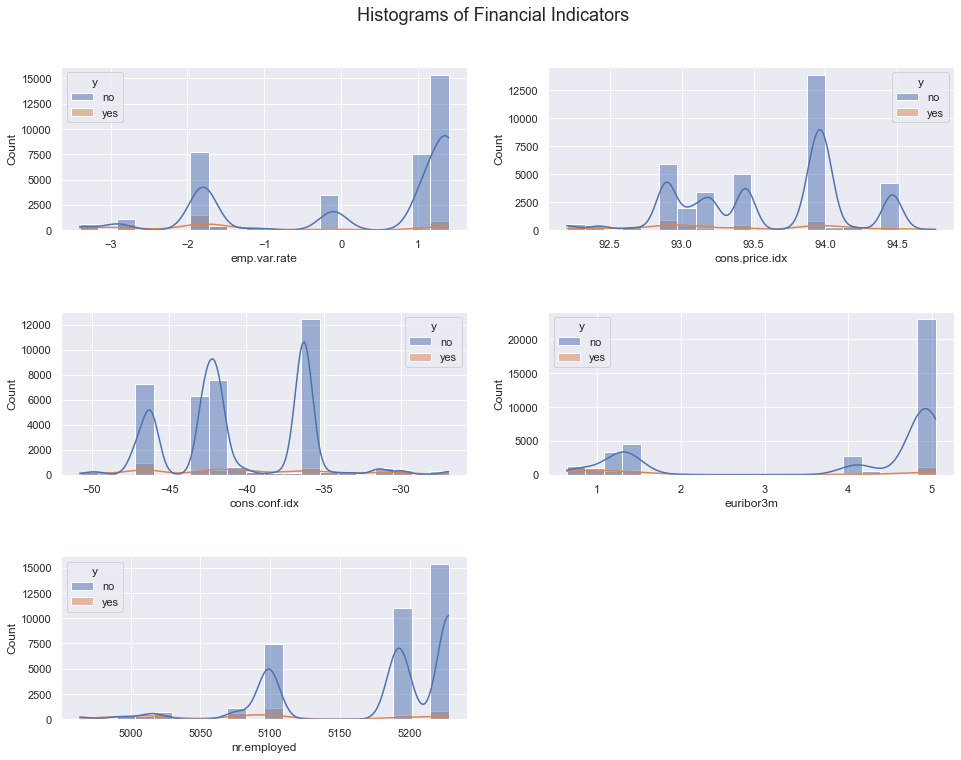

In [56]:
sns.set_style("darkgrid")
plt.subplots(figsize=(16, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Histograms of Financial Indicators", fontsize=18, y=0.95)

for i, col in enumerate(numeric_cols):
    ax = plt.subplot(3, 2, i+1)
    sns.histplot(data=df, x=col, hue = 'y', bins=20, kde=True, ax=ax)

plt.show()

### Client Contact

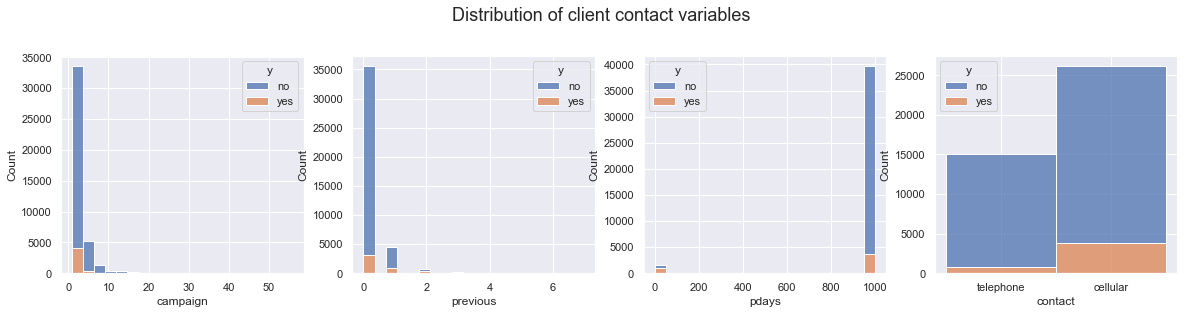

In [65]:
columns_to_examine = ['campaign', 'previous', 'pdays', 'contact']
sns.set_style("darkgrid")
plt.subplots(figsize=(20, 4))
plt.subplots_adjust(hspace=1)
plt.suptitle("Distribution of client contact variables", fontsize=18, y=1.05)

for i, col in enumerate(columns_to_examine):
    ax = plt.subplot(1, 4, i+1)
    sns.histplot(data=df, x=col, hue='y', bins=20, kde=False, ax=ax, multiple='stack')

plt.show()

In [ ]:
a,b,c = df.campaign.nunique(), df.previous.nunique(), df.pdays.nunique()
print(f"campaign has {a} unique values, previous has {b} unique values, and pdays has {c} unique values")

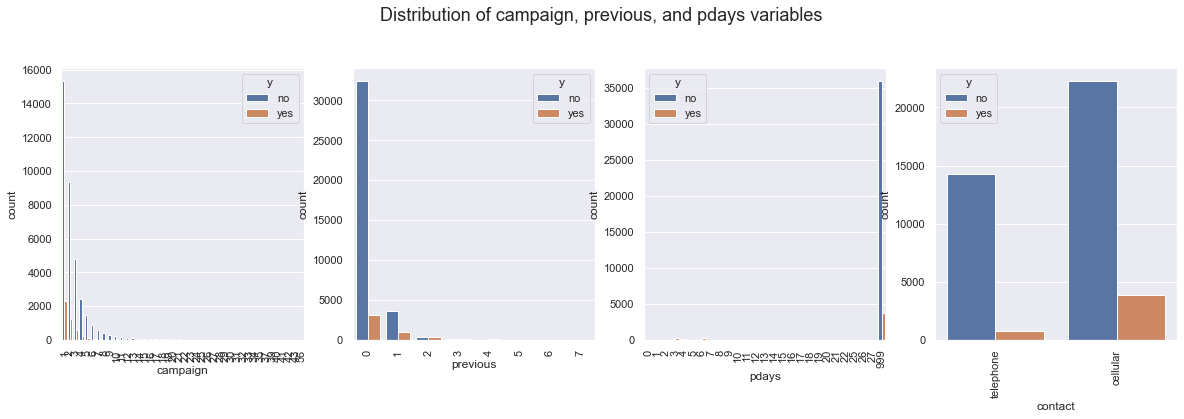

In [64]:
columns_to_examine = ['campaign', 'previous', 'pdays', 'contact']
sns.set_style("darkgrid")
plt.subplots(figsize=(20, 5))
plt.subplots_adjust(hspace=1)
plt.suptitle("Distribution of campaign, previous, and pdays variables", fontsize=18, y=1.05)

for i, col in enumerate(columns_to_examine):
    ax = plt.subplot(1, 4, i+1)
    sns.countplot(data=df, x=col, hue='y', ax=ax)

    # Rotate x-axis labels for better visibility
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

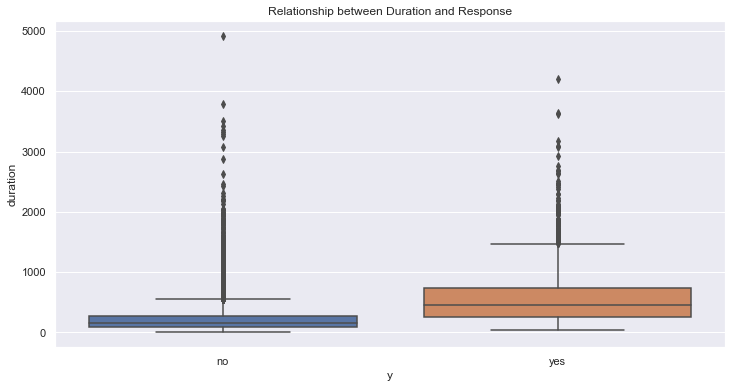

In [67]:
sns.boxplot(x='y', y='duration', data=df)
plt.title('Relationship between Duration and Response')
plt.show()

### Relationships between categorical

Lets us look at the first 6 categorical columns. Common sense dictates that these might be correlated. For example education level might be linked to job, which in turn might be linked to loan, house and default. 

In [ ]:
'''write function to plot relative densities'''

def dense_heat(df, cols):
    # put the column with the most unique values on the x-axis

    x = min(cols, key=lambda col: df[col].nunique())
    y = [col for col in cols if col != x][0]

    cross_tab = pd.crosstab(df[x], df[y], normalize='index')   # can normalise over row or column
    # Create a heatmap using seaborn
    sns.set(rc={'figure.figsize':(16,6)})
    sns.heatmap(cross_tab, annot=True, cmap='Oranges'  )
    plt.title('Distribution of {} and {}'.format(x, y))
    plt.xlabel('{}'.format(x))
    plt.xticks(rotation=30)
    plt.ylabel('{}'.format(y))

    plt.show()

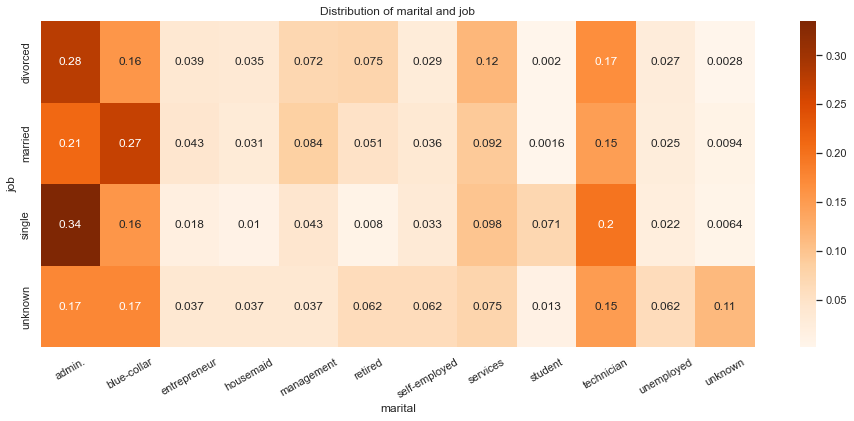

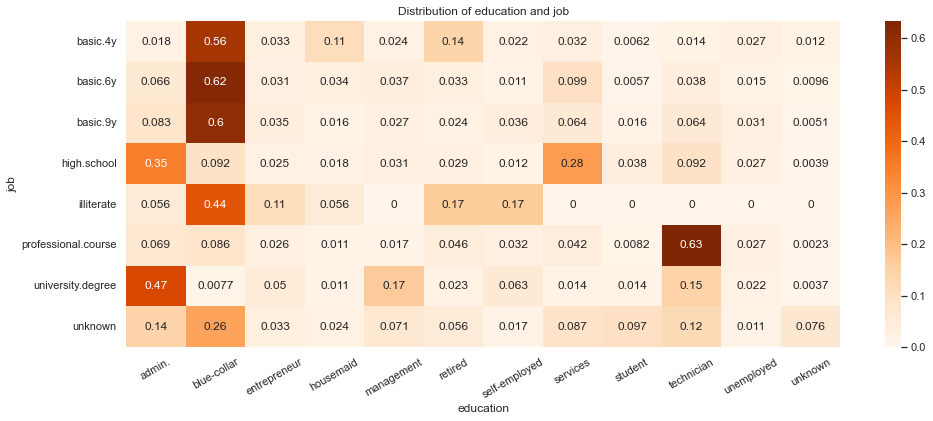

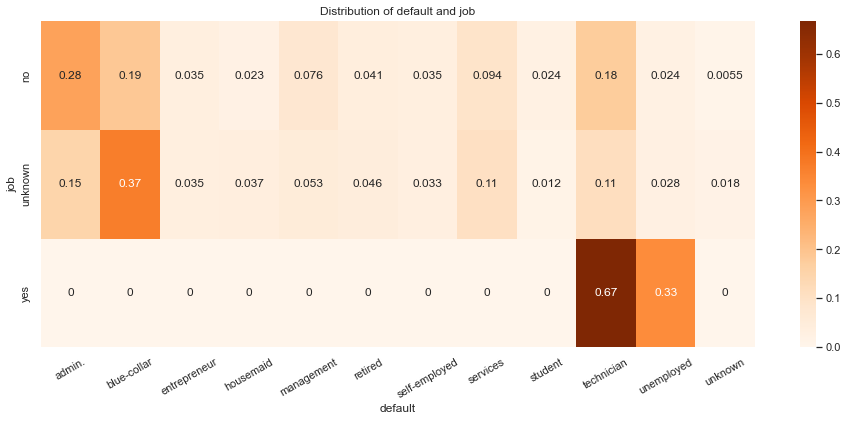

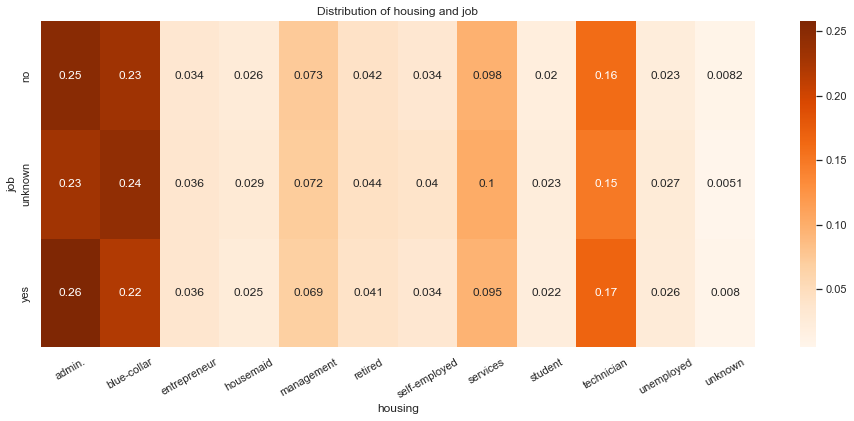

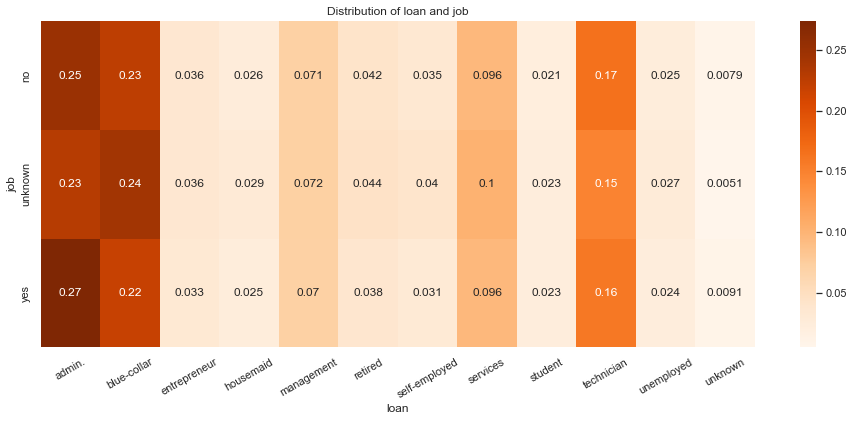

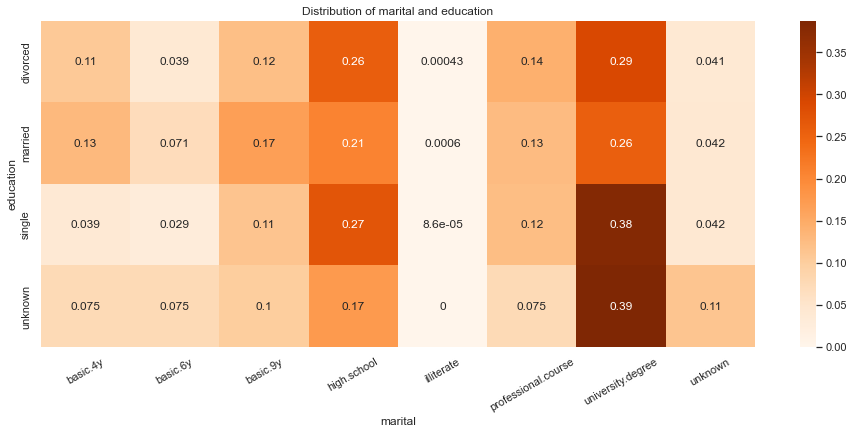

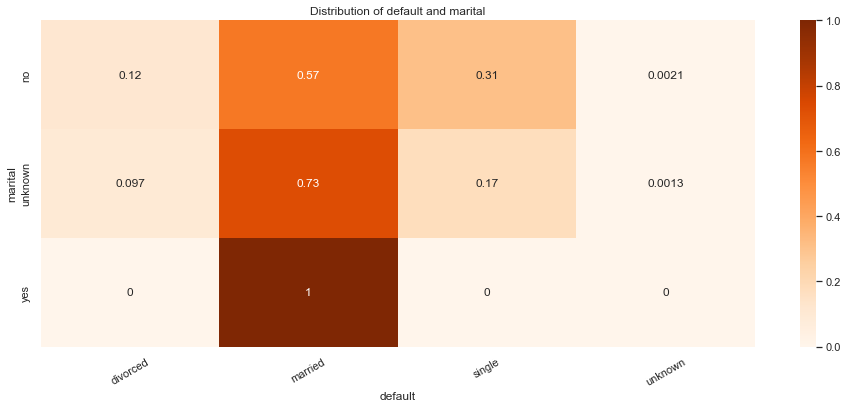

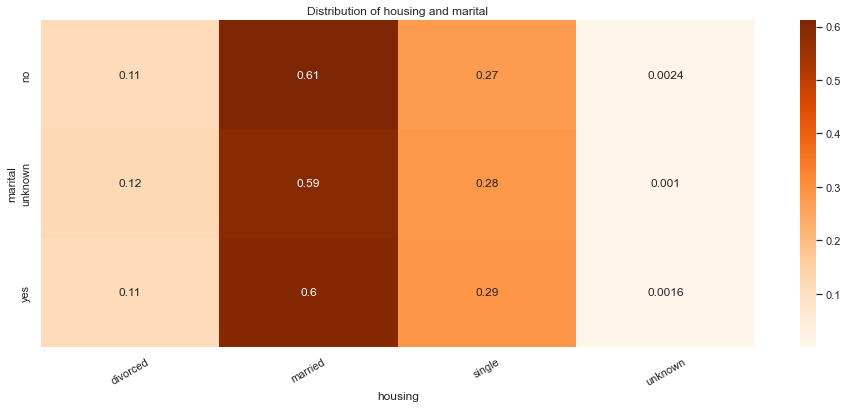

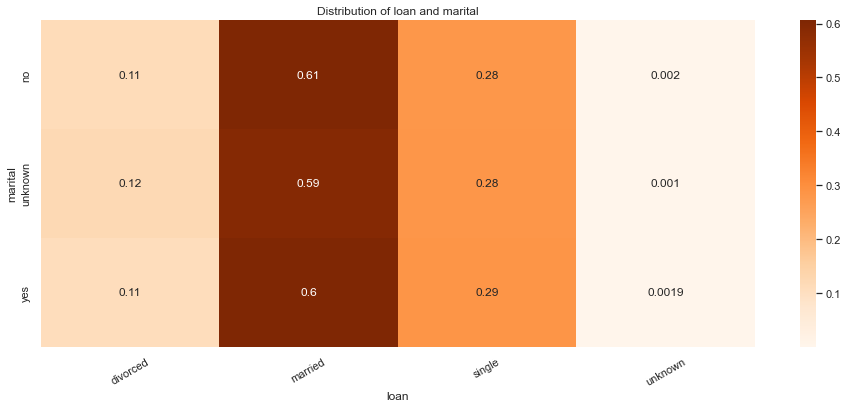

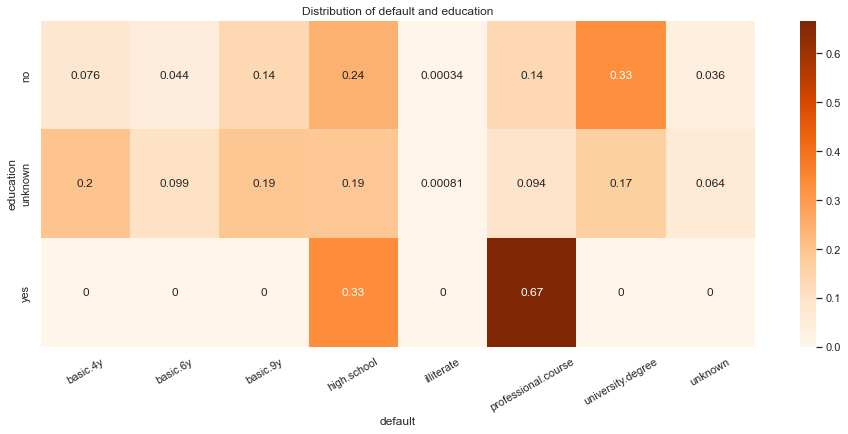

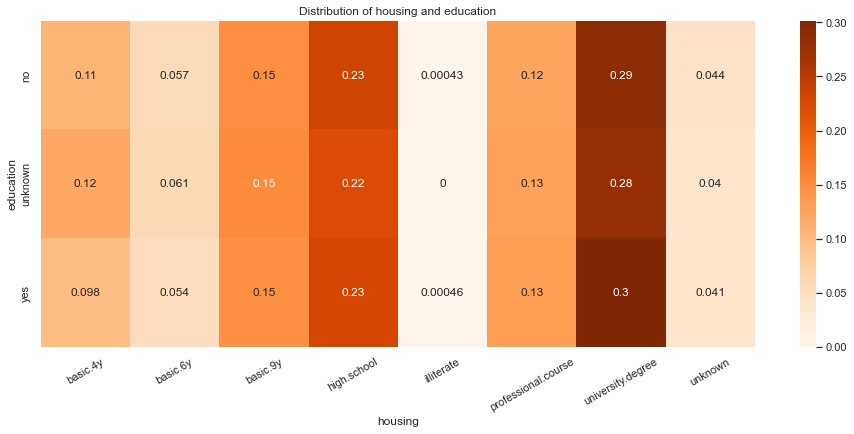

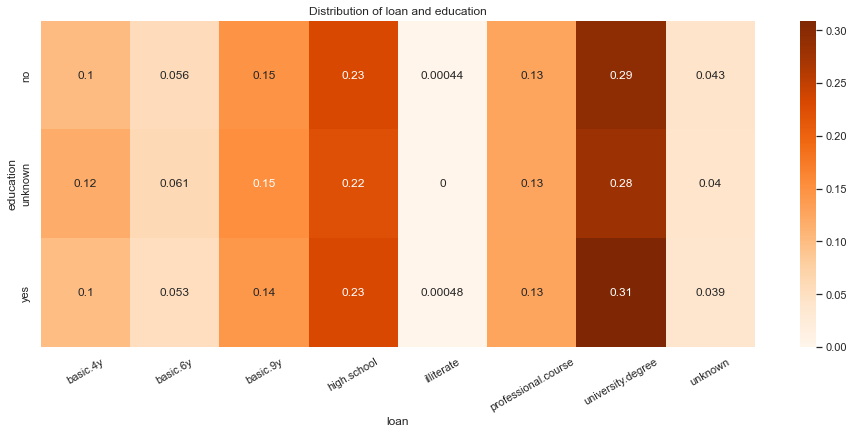

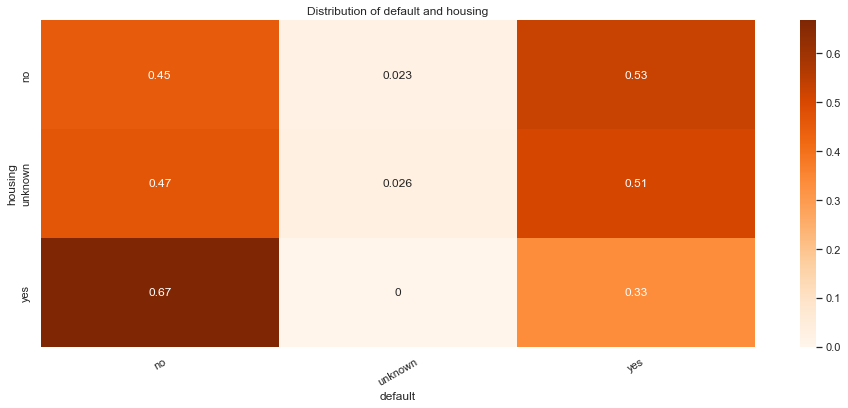

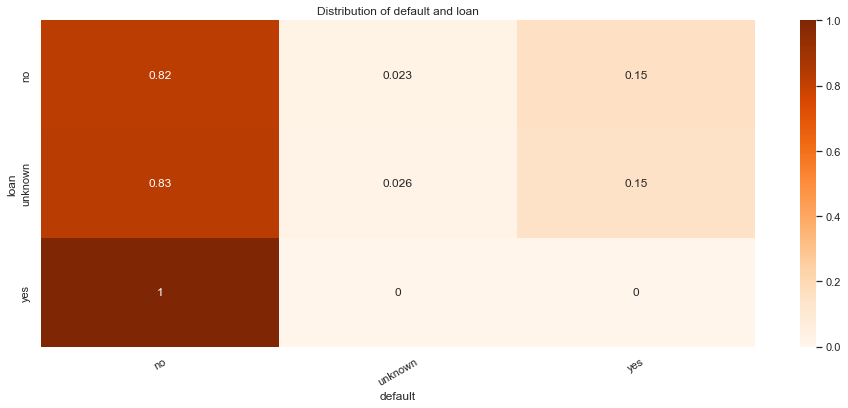

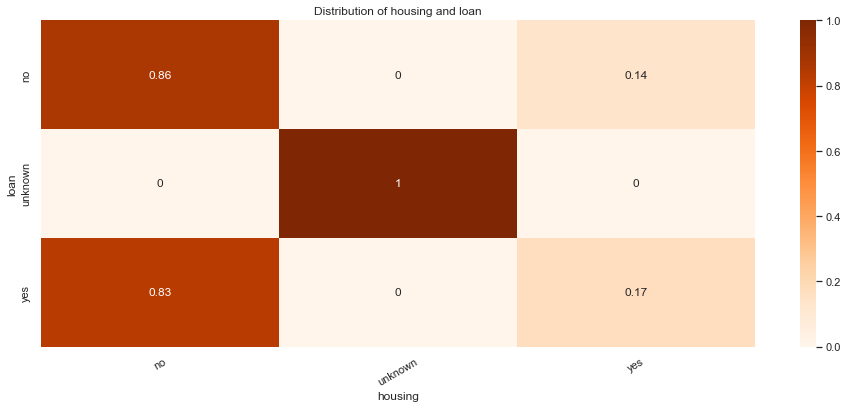

In [21]:
from itertools import combinations
# plot all combinations of the first 6 columns
for col in combinations(df_cat.columns[:6], 2):
    dense_heat(df, col)

The visualizations generated by the dense_heat() function provide a useful tool for exploring the relationships between pairs of categorical variables. The heatmaps highlight the distribution of values for each category combination, allowing us to visually identify any patterns or trends that may exist in the data.

For example, if we consider the dense heatmap for the combination of job and marital, we can see that there is a higher concentration of individuals who are married in certain job categories, such as management, technician, and blue-collar workers. On the other hand, students, unemployed individuals, and those in administrative roles tend to have a higher proportion of single individuals.

The heatmap for the combination of job and loan shows that individuals who are blue-collar workers, technicians, or administrative staff are more likely to have a housing loan. On the other hand, students and retired individuals are less likely to have a housing loan. This could indicate that certain job categories are more likely to require a mortgage or housing loan in order to purchase a home, while others may be more likely to rent or own their homes outright.

Another interesting relationship can be seen in the heatmap for the combination of education and loan. Here, we can see that individuals with higher levels of education are more likely to have a personal loan, while those with lower levels of education are less likely to have a personal loan. This could indicate that individuals with higher education levels may have greater financial literacy or may be more likely to invest in their own businesses or other ventures, which may require a personal loan.

Similarly, the heatmap for the combination of education and housing shows that the majority of individuals who have a housing loan also have a high school diploma or basic education, while those with more advanced degrees are more likely to own their own homes. This could indicate that there is a relationship between education level, home ownership, and the ability to secure a housing loan.

The heatmaps also allow us to identify any imbalances or biases in the data. For example, the heatmap for the combination of job and default shows that there are very few individuals who have defaulted on their loans in certain job categories, such as students, retired individuals, and those who are self-employed. This could indicate that there is some bias in the data collection process or that there are underlying factors that make certain individuals less likely to default on their loans.

Overall, the visualizations provide a valuable tool for exploring the relationships between categorical variables and gaining insights into the underlying patterns and trends in the data.

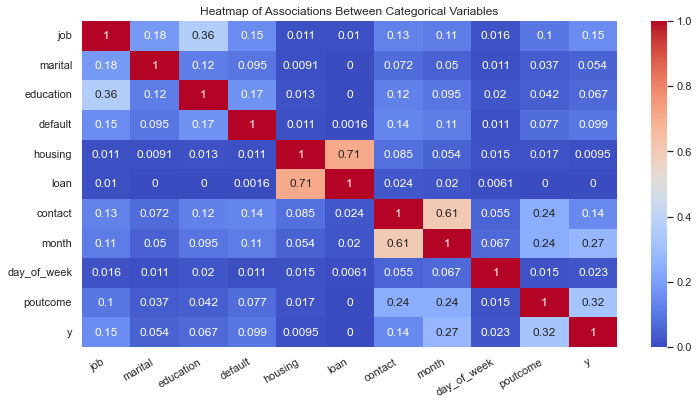

In [72]:
'''Cramer's V - Categorical Variables'''

def cramers_v(x, y):        # Cramer's V                        
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Select categorical columns
cat_columns = df.select_dtypes(include=['object']).columns

# Compute the Cramer's V matrix
cramers_v_matrix = pd.DataFrame(index=cat_columns, columns=cat_columns)

for col1 in cat_columns:
    for col2 in cat_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert the Cramer's V matrix elements to float
cramers_v_matrix = cramers_v_matrix.astype(float)
# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.xticks(rotation=30, ha='right')
plt.title("Heatmap of Associations Between Categorical Variables")
plt.show()

In [22]:
unknowns = [i for i in df.columns if 'unknown' in df[i].unique()]
print(f'unknowns --> {unknowns}')

unknowns --> ['job', 'marital', 'education', 'default', 'housing', 'loan']


/var/folders/3n/8zdy8bw105dfs66tqtrb_ql80000gn/T/ipykernel_1382/2969471853.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  unknowns = [i for i in df.columns if 'unknown' in df[i].unique()]


# Distribution of numerical data

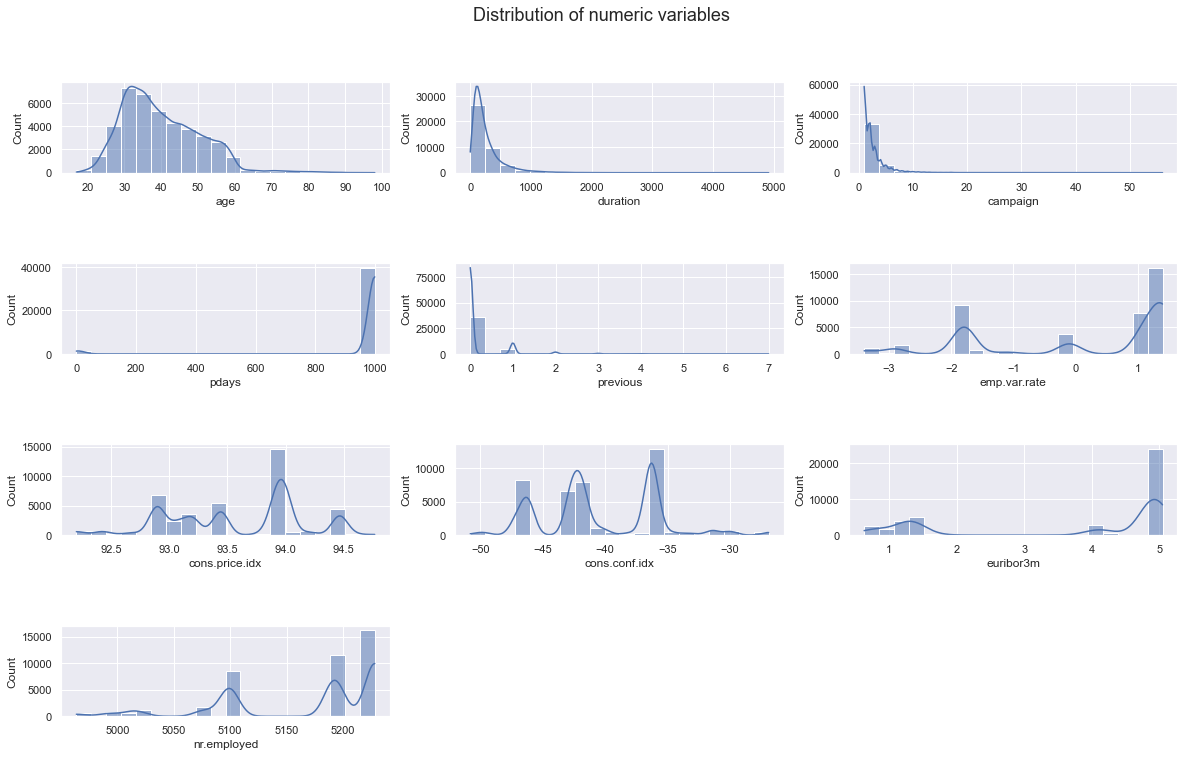

In [23]:
'''distribution of numeric variables'''
sns.set_style("darkgrid")
plt.subplots(figsize = (20,15))
plt.subplots_adjust(hspace=1)
plt.suptitle("Distribution of numeric variables", fontsize=18, y=0.95)
df = df_copy.copy()
df_num = df.select_dtypes(exclude='object')
for i,col in enumerate(df_num.columns):
    ax = plt.subplot(5,3,i+1)
    sns.histplot(data=df_num, x=col, bins=20, kde=True, ax=ax)
    # plt.show()
plt.show()

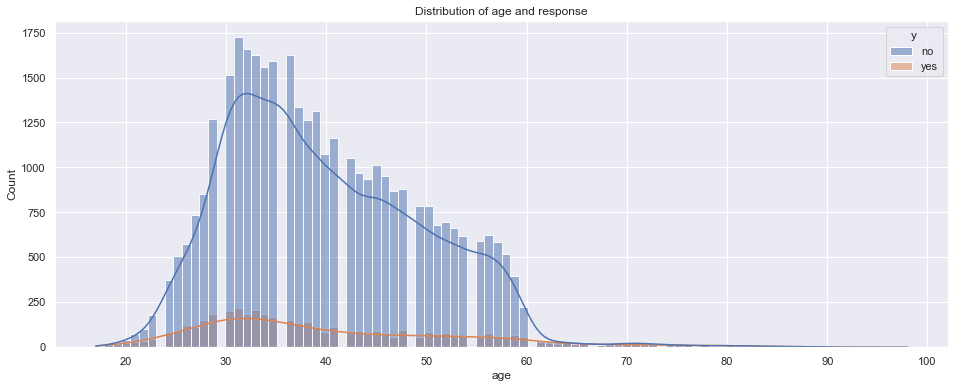

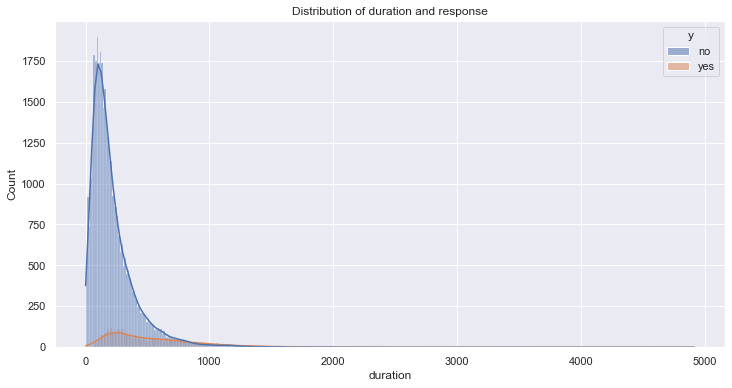

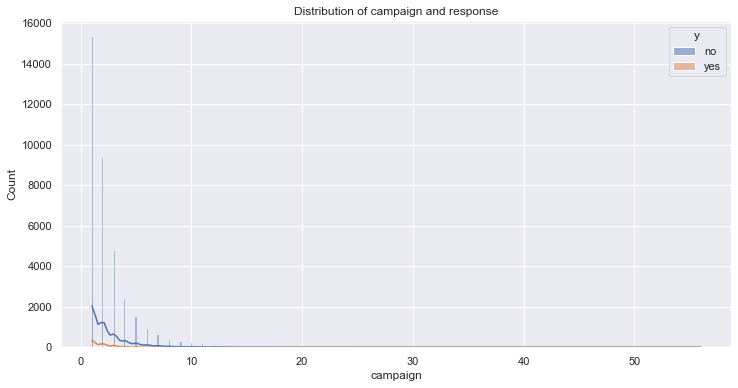

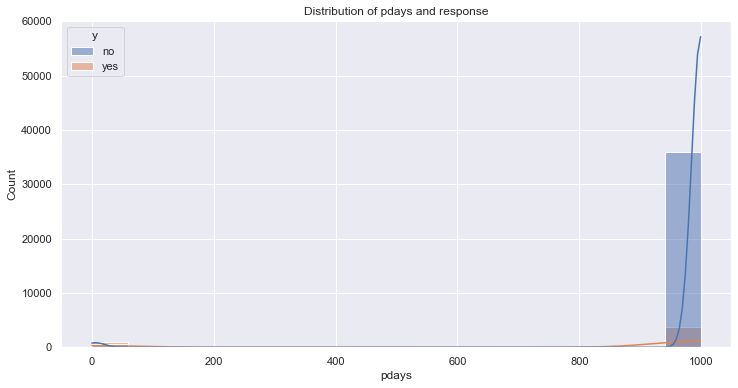

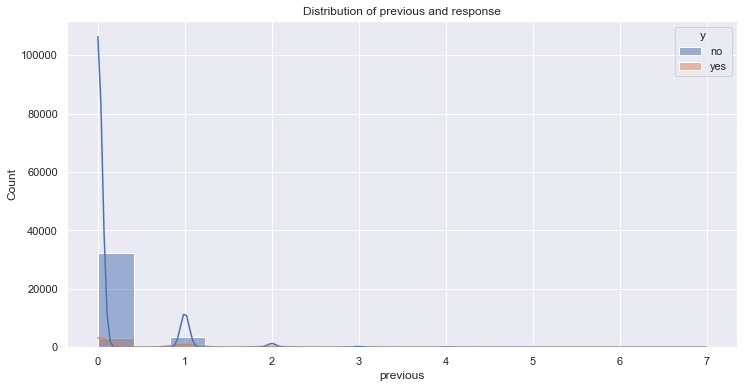

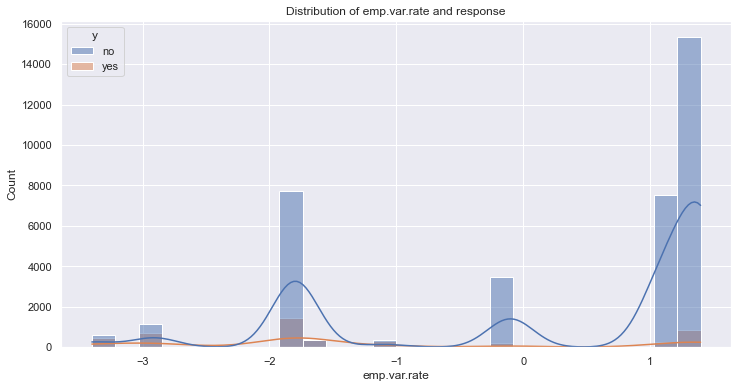

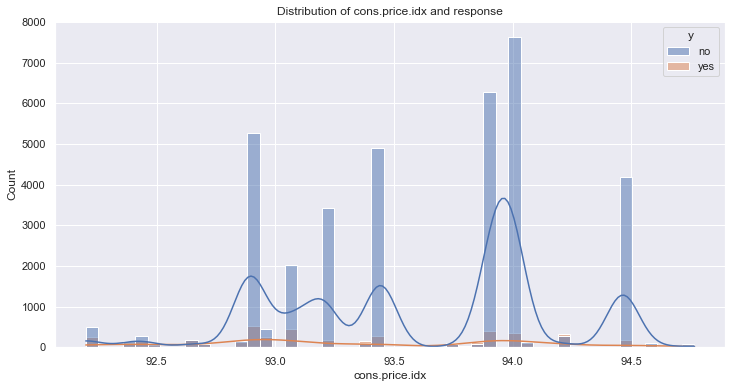

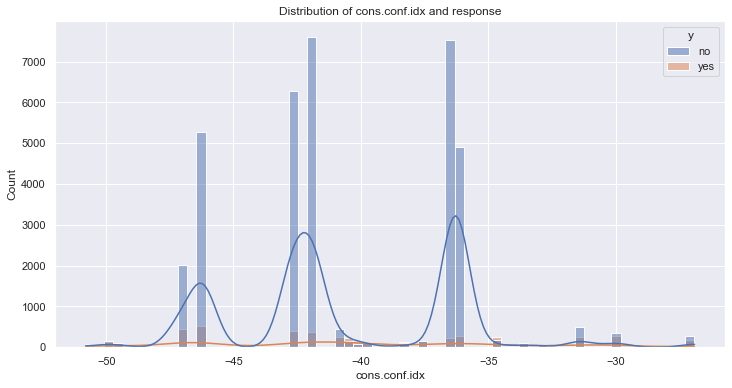

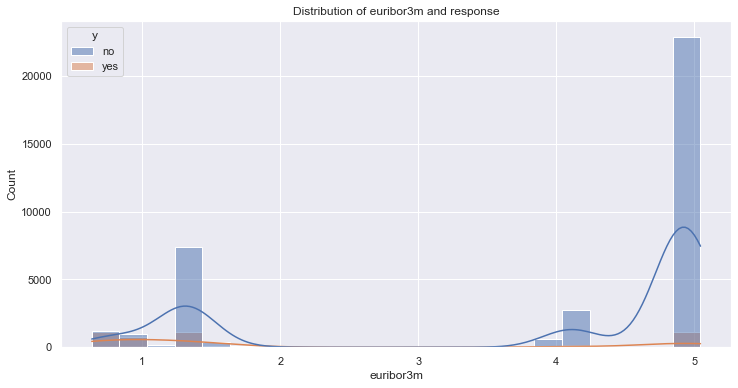

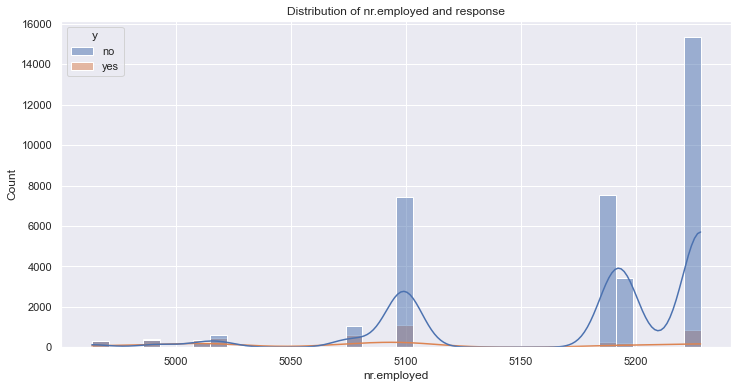

In [24]:
'''plot distribution of numeric variables and response'''
for c in df_num.columns:
    sns.histplot(x = df[c], hue = df['y'], kde = True).set(title='Distribution of {} and response'.format(c))
    sns.set(rc={'figure.figsize':(12,6)})
    plt.show()

## Correlation

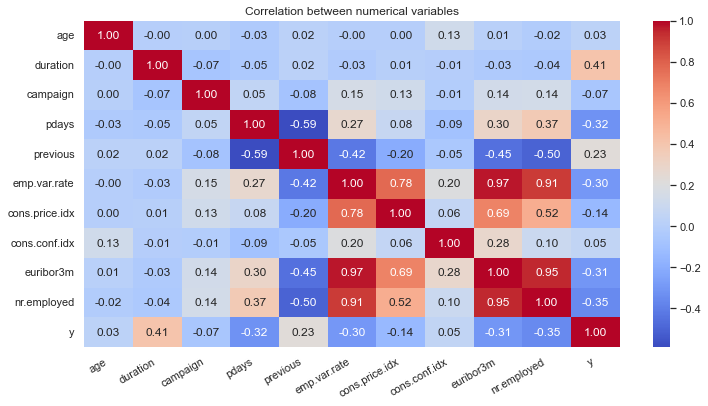

In [76]:
# Convert target variable into numeric
data = df.copy()
data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')
# heatmap of correlations between numerical variables
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.xticks(rotation=30, ha='right')
plt.title('Correlation between numerical variables')
plt.show()

# Outliers and Skewness

When the data is (approximately) normally distributed, we can use the Z-score treatment to deal with outliers. 

However, as we can see from the distributions, most of our columns have skewed distributions. So we can try using the IQR method. 

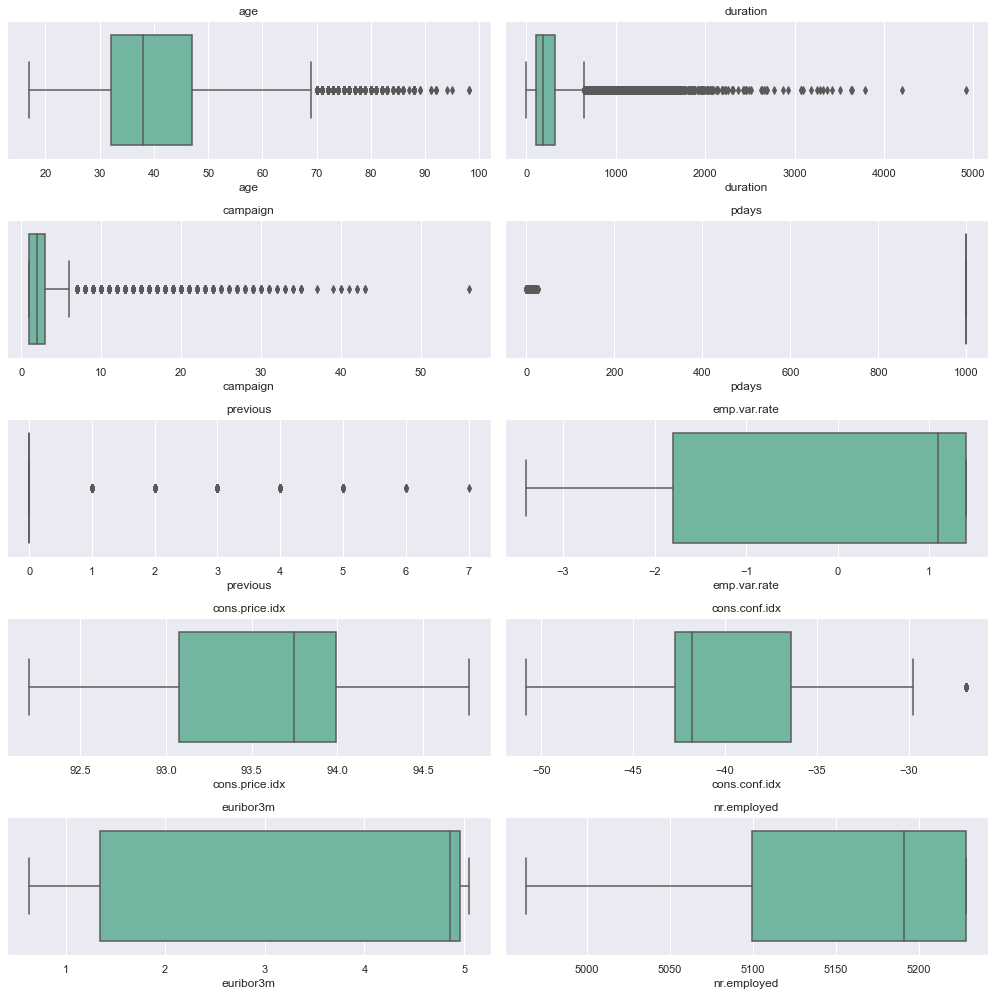

In [26]:
# plot in a grid
plt.figure(figsize=(14,14))
i = 1
for c in df_num.columns:
    plt.subplot(5, 2, i)
    i+=1
    sns.boxplot(x = df[c], hue = df['y'], palette='Set2')
    plt.title(f'{c}')
plt.tight_layout()        
plt.show()

In [27]:
# # plot seperately
# for c in df.columns:
#     if df[c].dtype == 'int64' or df[c].dtype == 'float64':
#         plt.figure(figsize=(12,8))
#         sns.boxplot(x = df[c], hue = df['y'], palette='Set2')
#         plt.title(f'{c}')
#         plt.show()

In [28]:
'''write functions to be utilised later to deal with outliers'''

# write a function to find outliers using IQR method
def iqr(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound, upper_bound
# write a function to trim outliers
def trim(df,col):
    lower_bound, upper_bound = iqr(df,col)
    df_trim = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df_trim
# write a function to cap outliers
def cap(df,col):
    lower_bound, upper_bound = iqr(df,col)
    df_cap = df.copy()
    df_cap[col] = df_cap[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df_cap
# write a function to replace outliers with threshold
def thresh(df, col, thresh):
    df_thresh = df.copy()
    df_thresh[col] = df_thresh[col].apply(lambda x: thresh if x > thresh else x)
    return df_thresh
# write a function to replace outliers with median
def replace_median(df,col):
    lower_bound, upper_bound = iqr(df,col)
    df_replace = df.copy()
    median = df_replace[col].median()
    df_replace[col] = df_replace[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return df_replace
# write a function to replace outliers with mean
def replace_mean(df,col):
    lower_bound, upper_bound = iqr(df,col)
    df_replace = df.copy()
    mean = df_replace[col].mean()
    df_replace[col] = df_replace[col].apply(lambda x: mean if x < lower_bound or x > upper_bound else x)
    return df_replace

In [29]:
'''write function to split plot by response'''
def split_plot(data, col, title, bar_label=False):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
    fig.suptitle('Distribution of {}'.format(title), fontsize=18)
    data_no = data[data['y']==0]
    data_yes = data[data['y']==1]
    sns.histplot(data_no[col], kde=True, color='#E14906', ax = ax1).set_title('Distribution for No')
    sns.histplot(data_yes[col], kde=True, color='#A14906', ax = ax2).set_title('Distribution for Yes')
    # remove small numbers from labels to make it neat
    if bar_label:
        labels1 = [str(v) if v > 10 else '' for v in ax1.containers[0].datavalues]
        ax1.bar_label(ax1.containers[0], labels=labels1)
        labels2 = [str(v) if v else '' for v in ax2.containers[0].datavalues]
        ax2.bar_label(ax2.containers[0], labels=labels2)
    plt.show()

    # print out some stats

    # print(f'{name} -->') 
    print(data['y'].value_counts())
    print(f'Proportion of no --> {round(data["y"].value_counts()[0]/len(data),2)}')
    print(f'Proportion of yes --> {round(data["y"].value_counts()[1]/len(data),2)}')
    print('Correlation with target --> {}'.format(data[col].corr(data['y'])))
    print("")

In [30]:
df_num.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

### Age

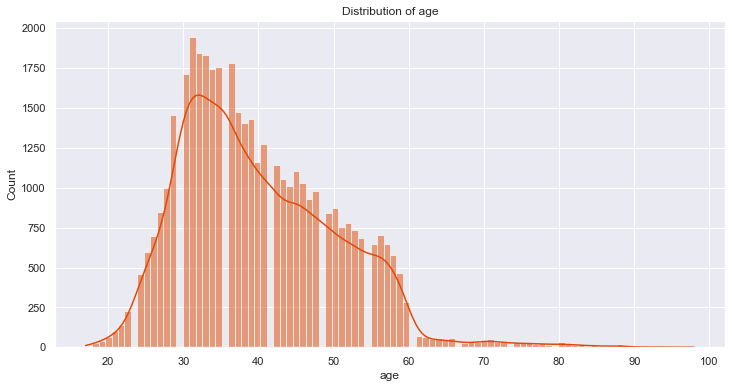

Number of unique values --> 78
Max value --> 98
Min value --> 17
Mean value --> 40.02

check correlation to response --> 0.030380536219875926


In [31]:
'''analyse age column'''

col = 'age'

sns.histplot(data[col], kde=True, color='#E14906').set_title('Distribution of {}'.format(col))
plt.show()
print('Number of unique values --> {}'.format(data[col].nunique()))
print('Max value --> {}'.format(max(data[col])))
print('Min value --> {}'.format(min(data[col])))
print('Mean value --> {}'.format(round(data[col].mean(),2)))
print("")
print('check correlation to response --> {}'.format(data[col].corr(data['y'])))

For the "age" column, we can tell that the distribution appears almost tri-modal but it is not heavily affected by outliers. Also, we don't want to lose meaningful information by forcing it to fit a distribution.

There is left-skewness, so we can try using log transform to see if the distribution approaches normal. 

It would seem that age is not log-normal. 

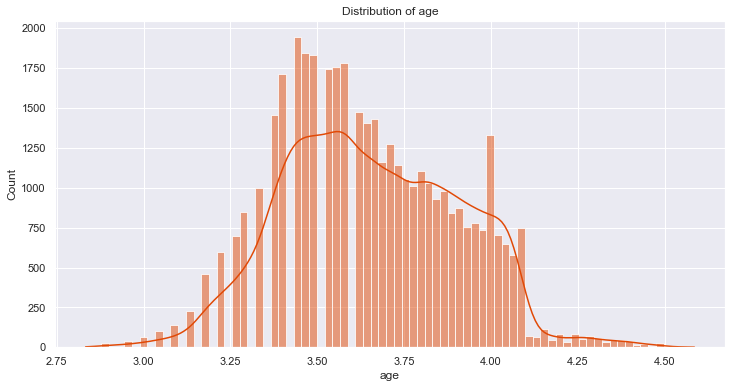

In [32]:
sns.histplot(np.log(data["age"]), kde=True, color='#E14906').set_title('Distribution of age')
plt.show()

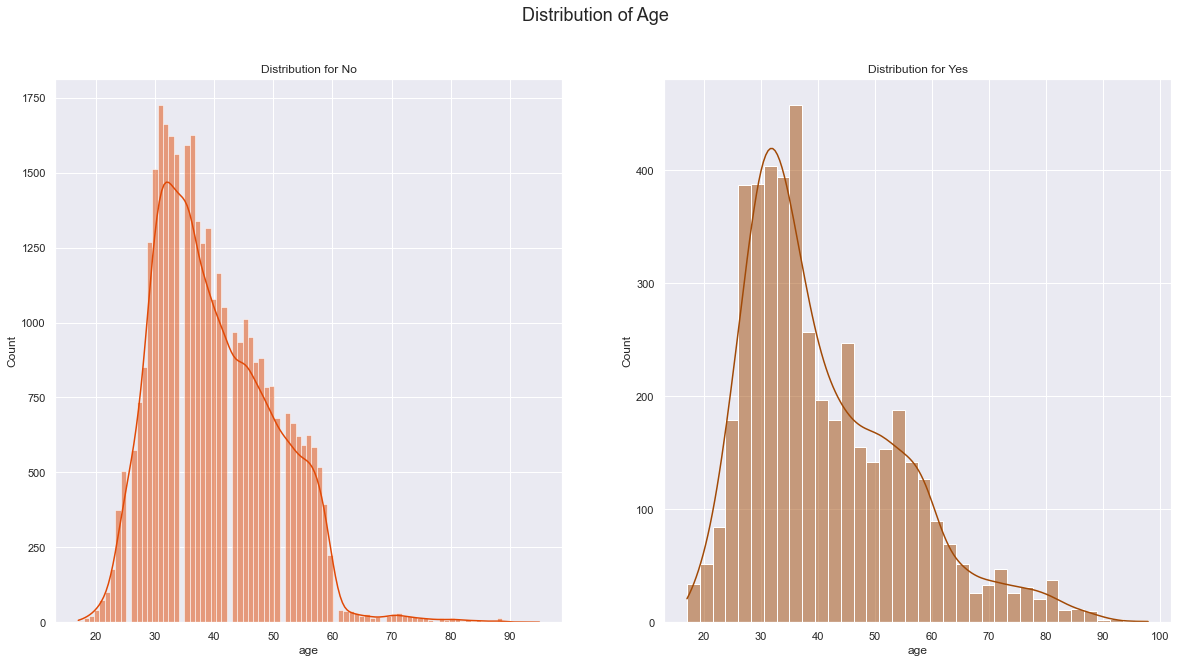

0    36537
1     4639
Name: y, dtype: int64
Proportion of no --> 0.89
Proportion of yes --> 0.11
Correlation with target --> 0.030380536219875926



In [33]:
'''plot splitting by response'''

split_plot(data,'age', 'Age', bar_label=False)

Observations

- There is a very slight negative correlation with response.
- The kernel density curves are almost the same shape, for all, for yes and for no.
- This means that age does not have a very strong influence on response. 

### Duration

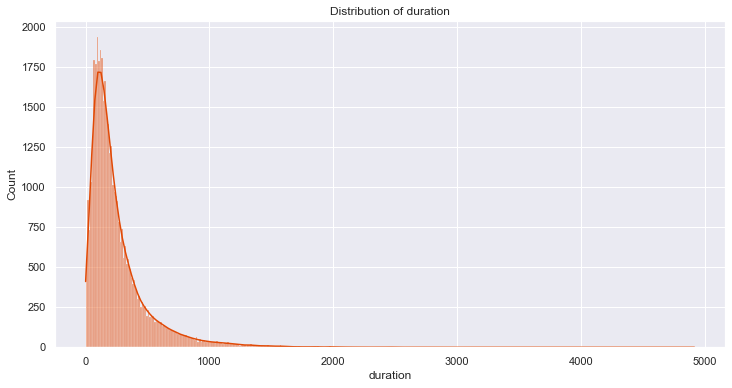

Number of unique values --> 1544
Max value --> 4918
Min value --> 0
Mean value --> 258.32

check correlation to response --> 0.4052972612685261

Proportion of values above 1500 --> 0.005
Proportion of values above 2000 --> 0.001
Proportion of values above 2500 --> 0.001


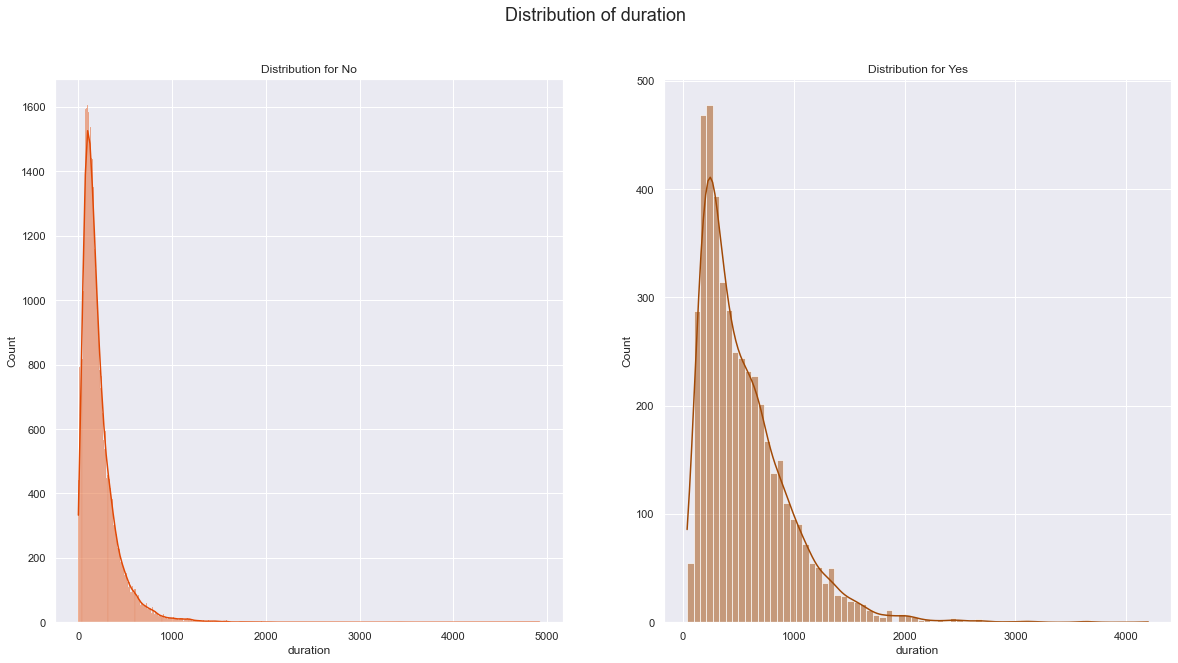

0    36537
1     4639
Name: y, dtype: int64
Proportion of no --> 0.89
Proportion of yes --> 0.11
Correlation with target --> 0.4052972612685261



In [34]:
'''analyse duration column'''

col = 'duration'

sns.histplot(data[col], kde=True, color='#E14906').set_title('Distribution of {}'.format(col))
plt.show()
print('Number of unique values --> {}'.format(data[col].nunique()))
print('Max value --> {}'.format(max(data[col])))
print('Min value --> {}'.format(min(data[col])))
print('Mean value --> {}'.format(round(data[col].mean(),2)))
print("")
print('check correlation to response --> {}'.format(data[col].corr(data['y'])))
print("")
for i in [1500,2000,2500]:
    print(f'Proportion of values above {i} --> {round(len(data[data[col] > i])/len(data),3)}')

##plot splitting by response

split_plot(data,col, col, bar_label=False)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


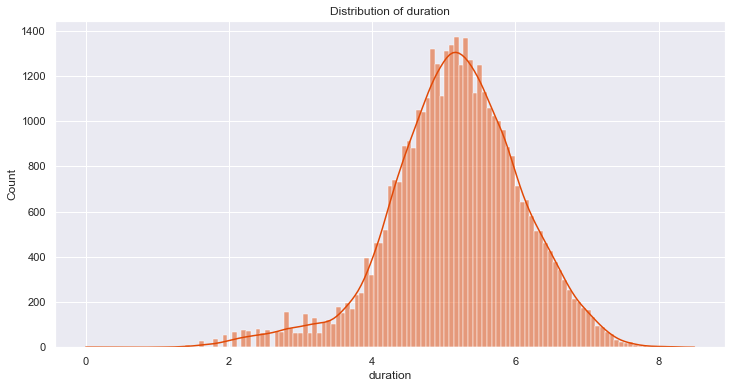

In [35]:
'''check if log-normal'''
col = 'duration'

sns.histplot(np.log(data[col]), kde=True, color='#E14906').set_title('Distribution of {}'.format(col))
plt.show()

Observations:

- The corraltion is very high but this is expected, since duration is only known after contact.
- The distribution is extrmely left-skewed. 
- Only 0.5% values are above 1500.
- Log transform approaches normal, but the distribution still has a heavy left tail.

### Campaign

The "camapign" column tells us how many times the client was contacted during the campaign. 

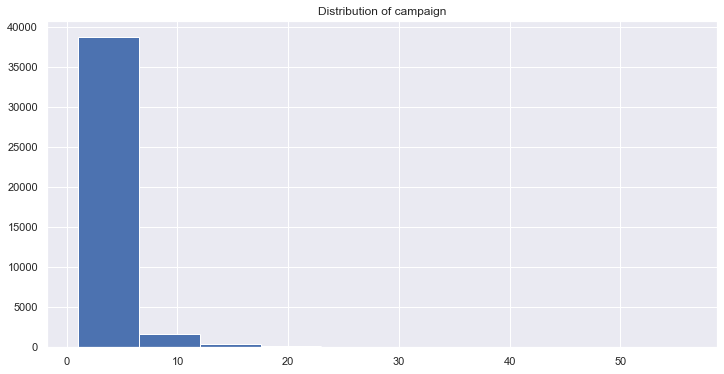

Unique values in campaign --> 
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
Number of unique values in campaign --> 
42
Proportion of values above 10 --> 0.021
Proportion of values above 15 --> 0.009
Proportion of values above 20 --> 0.004


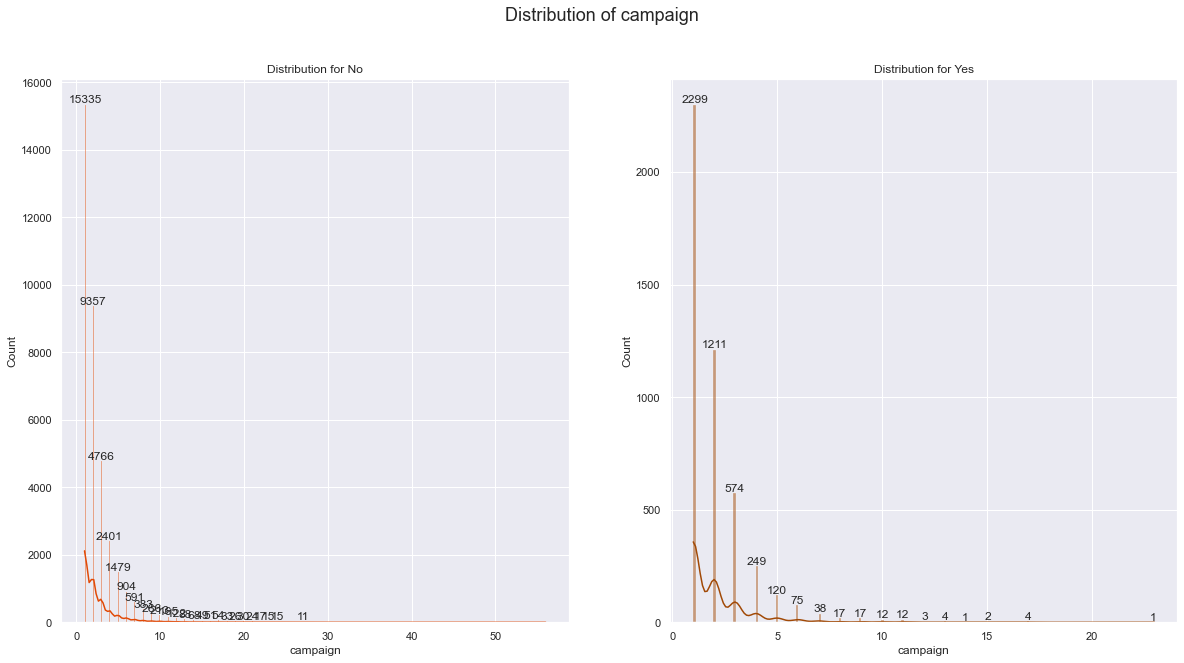

0    36537
1     4639
Name: y, dtype: int64
Proportion of no --> 0.89
Proportion of yes --> 0.11
Correlation with target --> -0.06636068437609938



In [36]:
'''analyse campaign column'''

plt.hist(data['campaign'], bins=10)
plt.title('Distribution of campaign')
plt.show()
print(f'Unique values in campaign --> ')
print(data['campaign'].unique())
print(f'Number of unique values in campaign --> ')
print(len(data['campaign'].unique()))
# find proportion of values above thresholds
for i in [10,15,20]:
    print(f'Proportion of values above {i} --> {round(len(data[data["campaign"] > i])/len(data),3)}')

## plot splitting by response

split_plot(data,'campaign', 'campaign', bar_label=True)
    

Observations

- The correlation to response is small but negative.
- The kernel density shapes look very similar for both responses.
- The density curve has almost the same shape as the curve for the unsplit dataset.
- Only 2% of the values are above 10, and barely 1% are above 15. In this case it might not be a bad idea to use capping to impute these outliers. We may set the threshold to 10 or 15 and compare results.


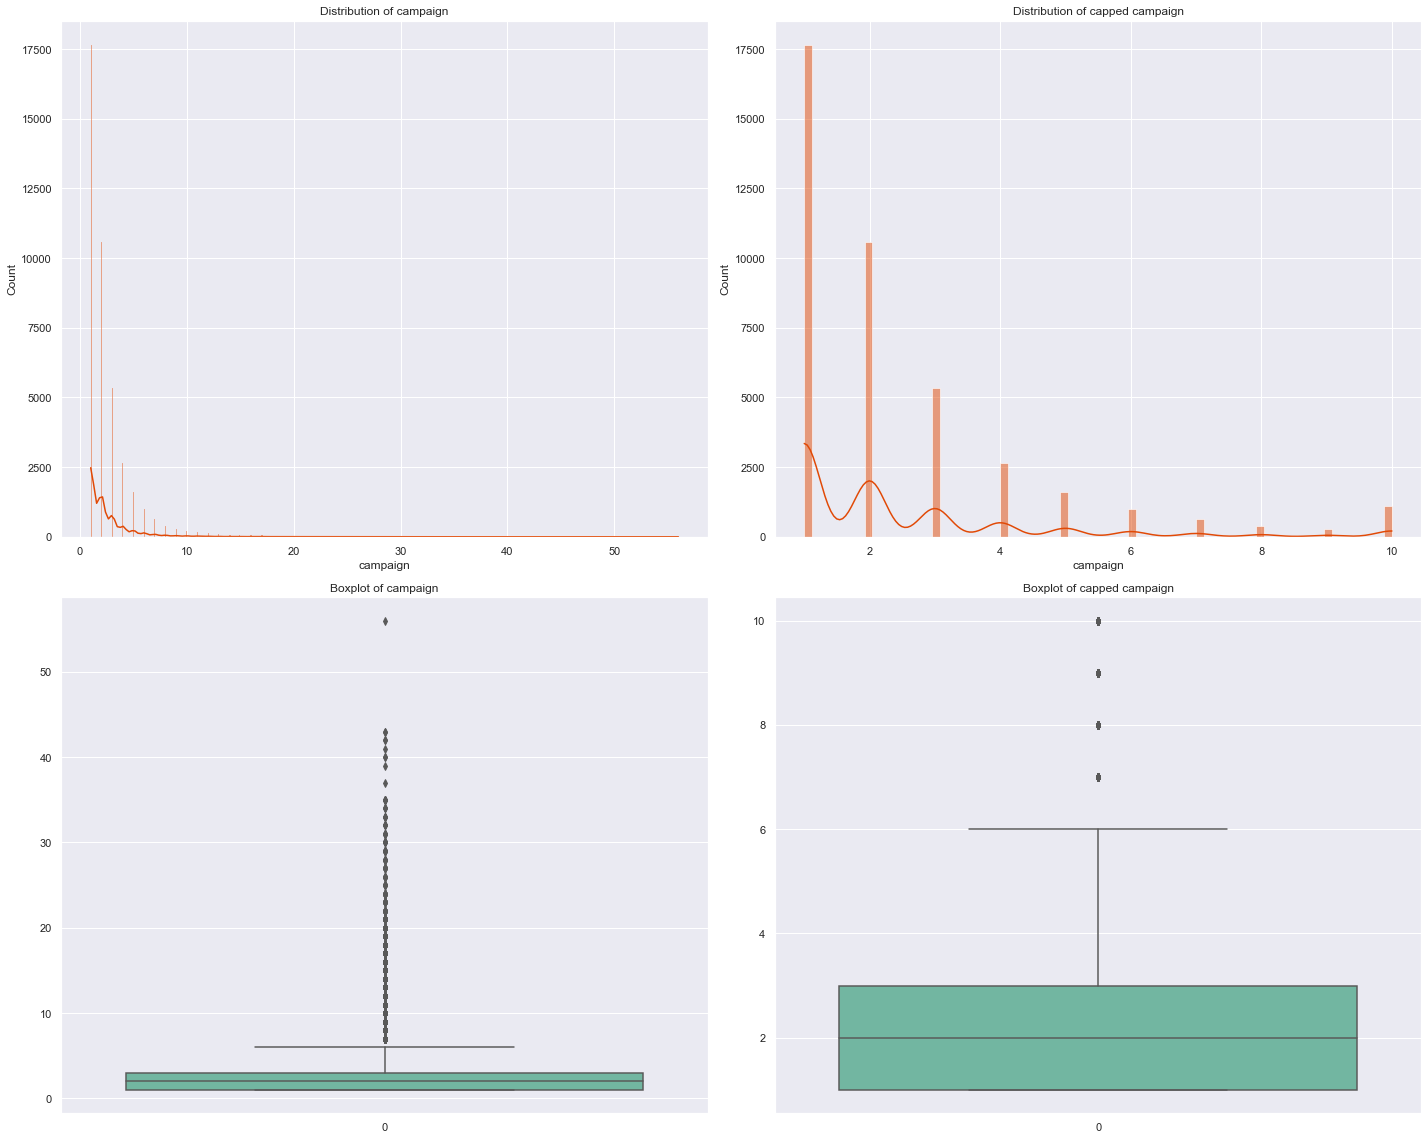

In [37]:
# use thresh function to cap outliers in campaign column
data_camp = thresh(data,'campaign', 10)  # try threshold of 10, 15, 20
# plot histograms and boxplots 
fig, (ax1, ax2) = plt.subplots(2,2, figsize=(20,16))
sns.histplot(data['campaign'], kde=True, color='#E14906', ax = ax1[0])
ax1[0].set_title('Distribution of campaign')
sns.histplot(data_camp['campaign'], kde=True, color='#E14906', ax = ax1[1])
ax1[1].set_title('Distribution of capped campaign')
sns.boxplot(data['campaign'], palette='Set2', ax = ax2[0])
ax2[0].set_title('Boxplot of campaign')
sns.boxplot(data_camp['campaign'], palette='Set2', ax = ax2[1])
ax2[1].set_title('Boxplot of capped campaign')
plt.tight_layout()
plt.show()

The plots show some improvement after applying the 'thresh' function. It seems like the threshold can be further lowered from 10 to about 6. In fact the plot with thresh = 6 does about the same thing as using 'cap' function with IQR.

### Pdays

The "pdays" columns tells us how many days have passed since last contact made during the previous campaign. The value 999 means there was no contact in the previous campaign. From the analysis below we can see that 96% of the customers were never contacted. Since this is such a large proportion, it will dominate any effect this variable has on the response. It would be worthwhile to examine the rest of the data to see whether there is any difference. 

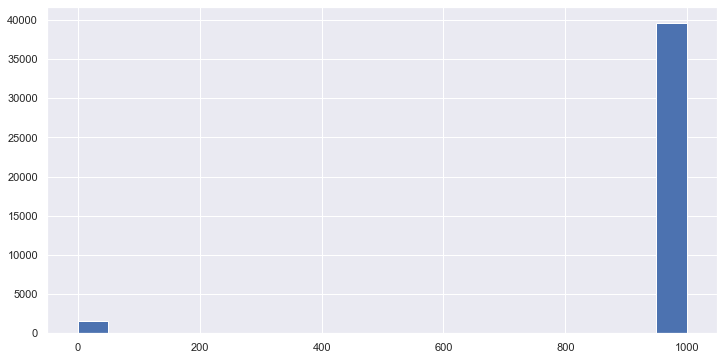

Number of unique values --> 27
Max value --> 999
Min value --> 0
Number of values equal to 999 --> 39661
Proportion of values equal to 999 --> 0.96

check correlation to response --> -0.324947586385585


In [38]:
'''analyse pdays column'''

plt.hist(data['pdays'], bins=20)
plt.show()
print('Number of unique values --> {}'.format(data['pdays'].nunique()))
print('Max value --> {}'.format(max(data['pdays'])))
print('Min value --> {}'.format(min(data['pdays'])))
print(f'Number of values equal to 999 --> {len(df[df["pdays"] == 999])}')
print(f'Proportion of values equal to 999 --> {round(len(df[df["pdays"] == 999])/len(df),2)}')
print("")
print('check correlation to response --> {}'.format(data['pdays'].corr(data['y'])))

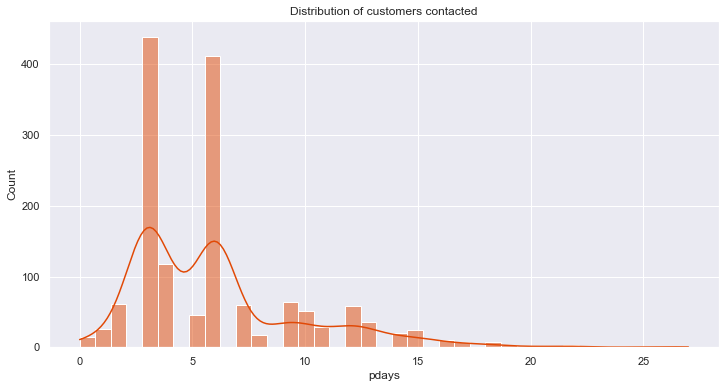

total number of customers contacted = 1515
Customer contacted min = 0
Customer contacted max = 27

check correlation to response --> -0.03522348402414881


In [39]:
'''analyse customers who were contacted'''

contact = data[data['pdays']!=999]
# check distribution of pdays without 999
sns.histplot(data = contact, x = 'pdays', kde=True, color='#E14906').set_title(
                                            'Distribution of customers contacted')
plt.show()
print('total number of customers contacted = {}'.format(len(contact)))
print('Customer contacted min = {}'.format(contact['pdays'].min()))
print('Customer contacted max = {}'.format(contact['pdays'].max()))
print("")
print('check correlation to response --> {}'.format(contact['pdays'].corr(contact['y'])))

We can get better insight into the data by examining this small section (4%) in isolation. 

The distribution is now left skewed instead of right. There is still a negative correlation with the response variable but it is much smaller, -0.035 compared to -0.32. 

Let us split the data by response (yes or no) and examine the differences between:
- all customers
- customers who were contacted in previous campaign
- customers who were not contacted in previous campaign

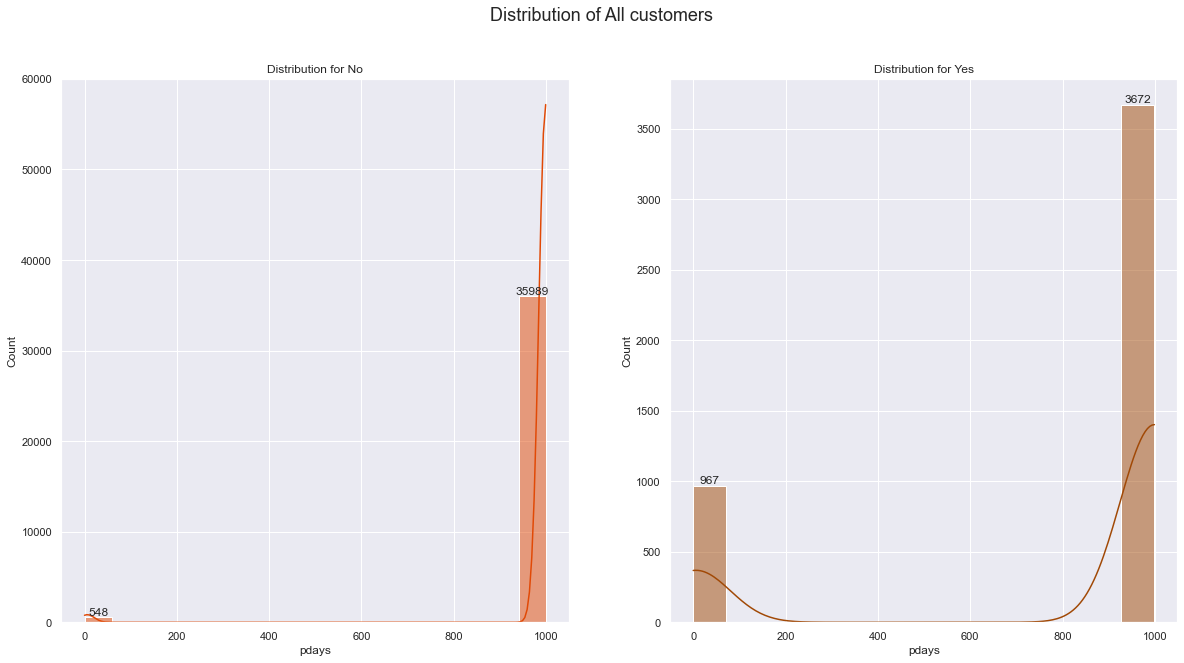

0    36537
1     4639
Name: y, dtype: int64
Proportion of no --> 0.89
Proportion of yes --> 0.11
Correlation with target --> -0.324947586385585



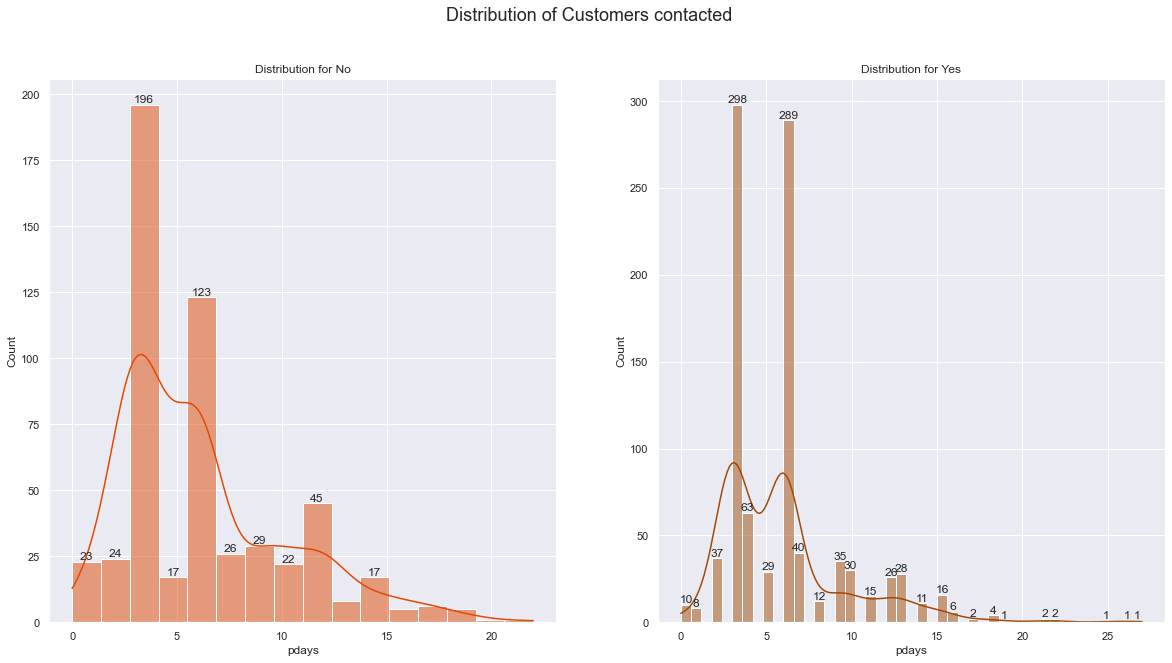

1    967
0    548
Name: y, dtype: int64
Proportion of no --> 0.36
Proportion of yes --> 0.64
Correlation with target --> -0.03522348402414881



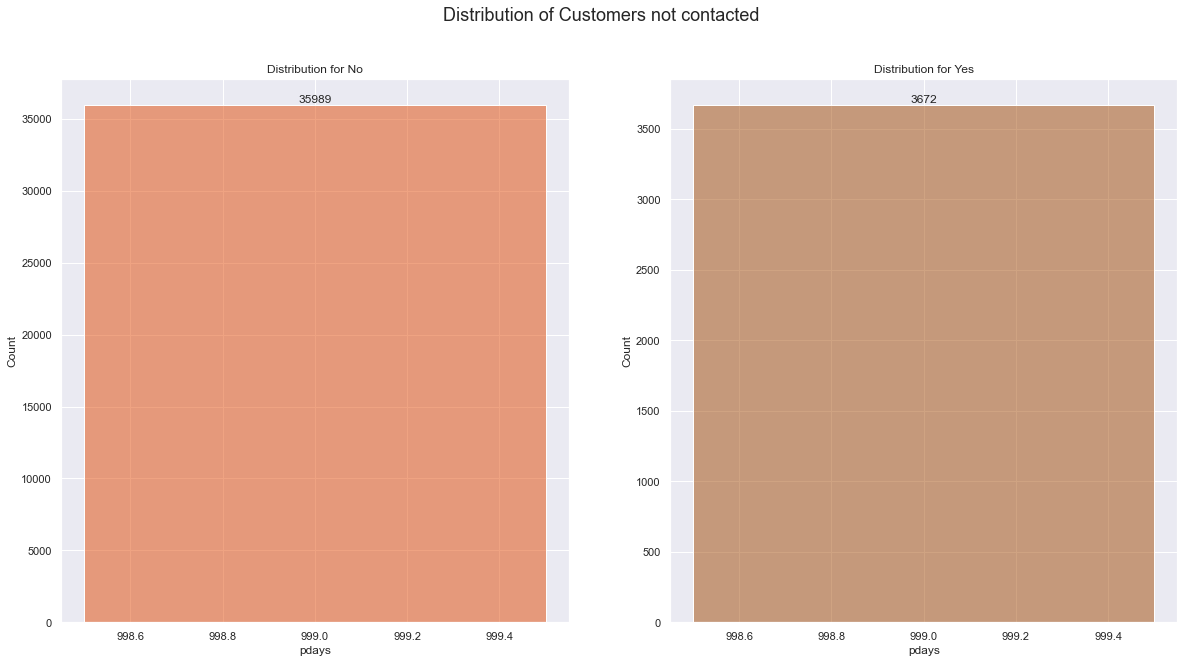

0    35989
1     3672
Name: y, dtype: int64
Proportion of no --> 0.91
Proportion of yes --> 0.09
Correlation with target --> nan



In [40]:
'''plot splitting by response'''

all_customers = data
customer_contacted = data[data['pdays']!=999]
customer_not_contacted = data[data['pdays']==999]

titles = ['All customers', 'Customers contacted', 'Customers not contacted']
for i, data in enumerate([all_customers, customer_contacted, customer_not_contacted]):
    split_plot(data,'pdays', titles[i], bar_label=True)

This examination has revealed many things.
- Probability of positive response (yes) is 0.11 for all customers.
- Probability of positive response is 0.64 for cuustomers who were contacted.
- Probability of positive response is 0.09 for customers who were not contacted. 
- The correlation to response is much lower if customer has been contacted compared to all customers.
- The distribution of positive and negative response 'pdays' is quite similar. Although the values are higher for positive response (yes), the kde's have almost the same shape.

### Previous

The "previous" column tells us how many times the client was contacted during the previous campaign. As we can see from the analysis below, only 2% of clients were contacted more than 5 times. Capping might be the way to deal with outliers here, or better solution might be to create bins of variable length. 


It can be seen from the heat map that pdays and previous are highly correlated. It might be worth considering to drop on of these columns. 

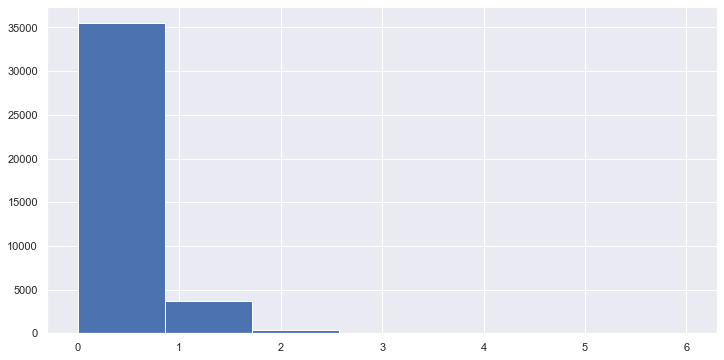

Unique values in previous --> 
[0 1 2 3 4 5 6]
Number of unique values in previous --> 
7
Proportion of values above 3 --> 0.0
Proportion of values above 4 --> 0.0
Proportion of values above 5 --> 0.0
0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64
Proportion of customers not contacted --> 0.9


In [41]:
'''analyse previous column'''

plt.hist(data['previous'], bins=7)
plt.show()
print(f'Unique values in previous --> ')
print(data['previous'].unique())
print(f'Number of unique values in previous --> ')
print(len(data['previous'].unique()))
# find proportion of values above thresholds
for i in [3,4,5]:
    print(f'Proportion of values above {i} --> {round(len(data[data["previous"] > i])/len(data),3)}')
print(df['previous'].value_counts())
print('Proportion of customers not contacted --> {}'.format(round(len(data[data["previous"] == 0])/len(data),2)))
    

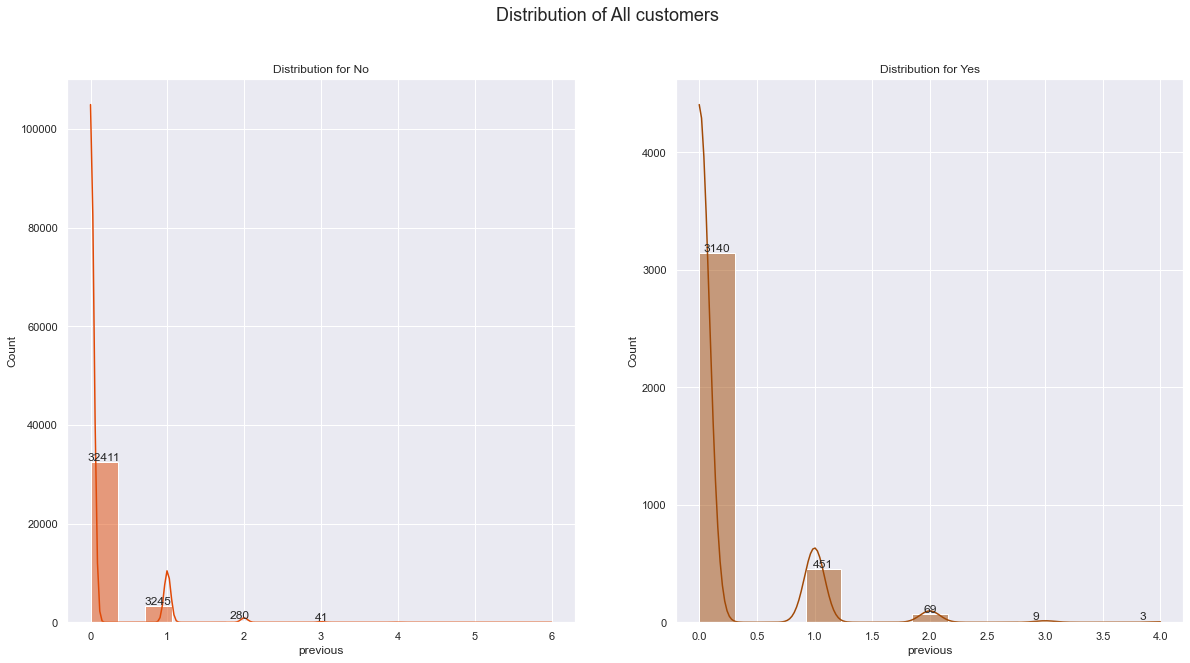

0    35989
1     3672
Name: y, dtype: int64
Proportion of no --> 0.91
Proportion of yes --> 0.09
Correlation with target --> 0.047988066756706055



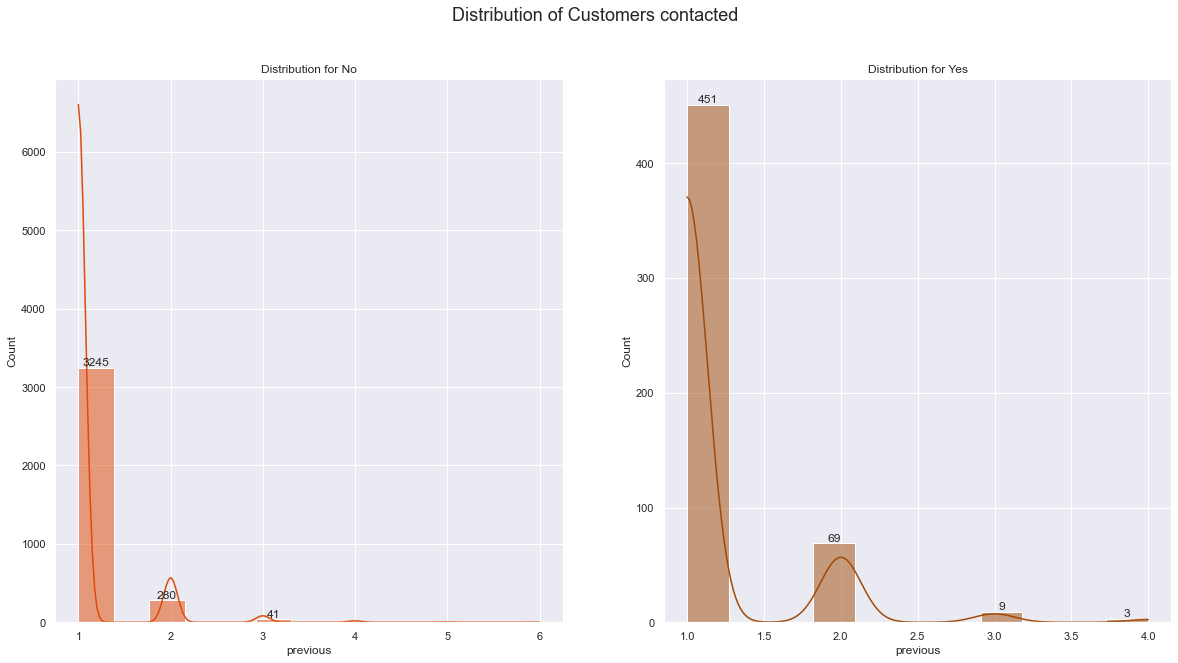

0    3578
1     532
Name: y, dtype: int64
Proportion of no --> 0.87
Proportion of yes --> 0.13
Correlation with target --> 0.05732091343356157



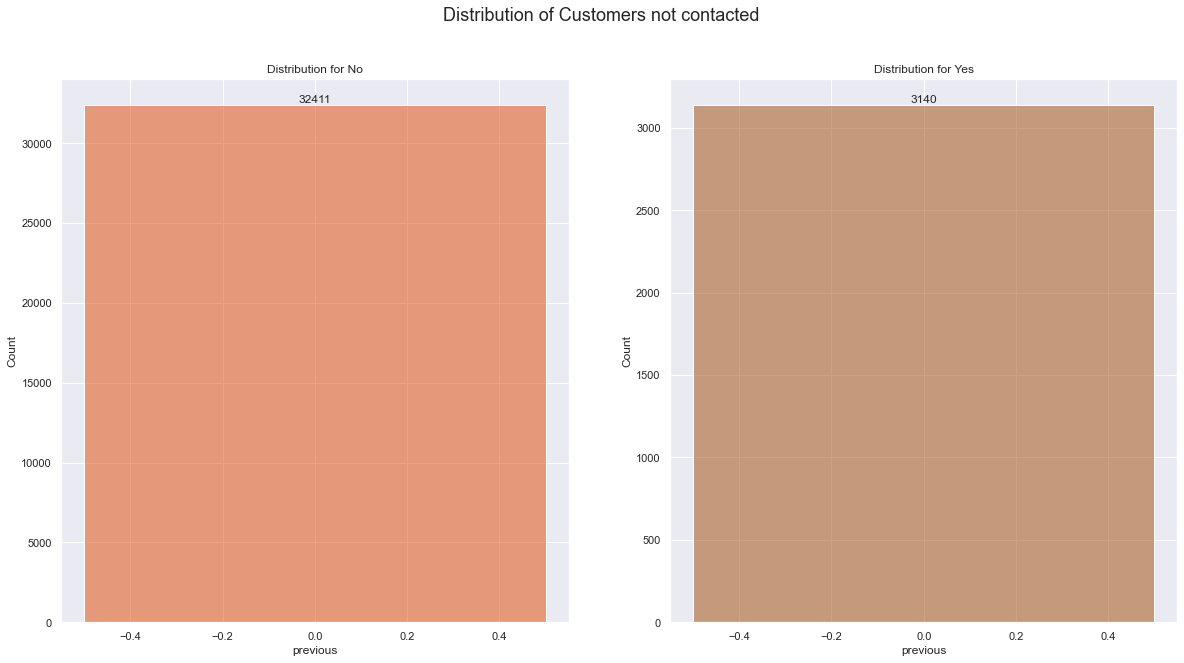

0    32411
1     3140
Name: y, dtype: int64
Proportion of no --> 0.91
Proportion of yes --> 0.09
Correlation with target --> nan



In [42]:
'''plot splitting by response'''

all_customers = data
customer_contacted = data[data['previous']!=0]
customer_not_contacted = data[data['previous']==0]

titles = ['All customers', 'Customers contacted', 'Customers not contacted']

for i, data in enumerate([all_customers, customer_contacted, customer_not_contacted]):
    split_plot(data,'previous', titles[i], bar_label=True)

Observations:

- When we compare the whole dataset to only those customers who were contacted, the ratio of positive response rises from 0.11 to 0.27.
- The correlation with the response stays approximately the same or all and contacted.
- The proportion of customers not contacted is 90%. This is different from the proportion we got when we applied the same selection criterion to "pdays".
- Only 2% of the values are above 3, only 24 that are 5 or above. We can try using threshold for this variable as well, although, there are so few unique values (8) that it should not make much of a difference in model training. 

The ratio of no to yes in the last result differs slightly from the dataset. 

Checks below show that there are 4110 entries which might be wrong.

In [43]:
check1 = data[(data['pdays']==999) & (data['previous']!=0)] ## no contact and contact - should be empty
check2 = data[(data['pdays']!=999) & (data['previous']==0)] ## contact and no contact - correct
check3 = data[(data['pdays']==999) & (data['previous']==0)] ## no contact and no contact - correct
check4 = data[(data['pdays']!=999) & (data['previous']!=0)] ## contact and contact - correct
print(len(check1))
print(len(check2))
print(len(check3))
print(len(check4))

0
0
35551
0


### emp.var.rate

It seems Employment Variation Rate is a obsolete measure since no information can be found on it in OECD, World Bank or Eurostat databases. From what can be gathered, EVR measures the percentage change in employment levels over time, in this case over quarters.

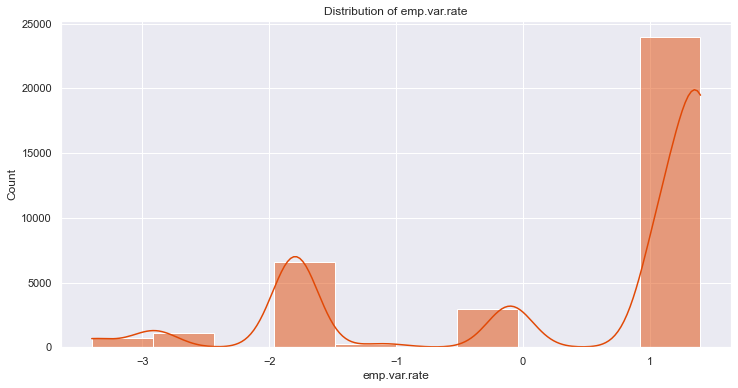

Number of unique values --> 10
Unique values --> [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
Max value --> 1.4
Min value --> -3.4
Mean value --> 0.38

check correlation to response --> -0.25475240316494974



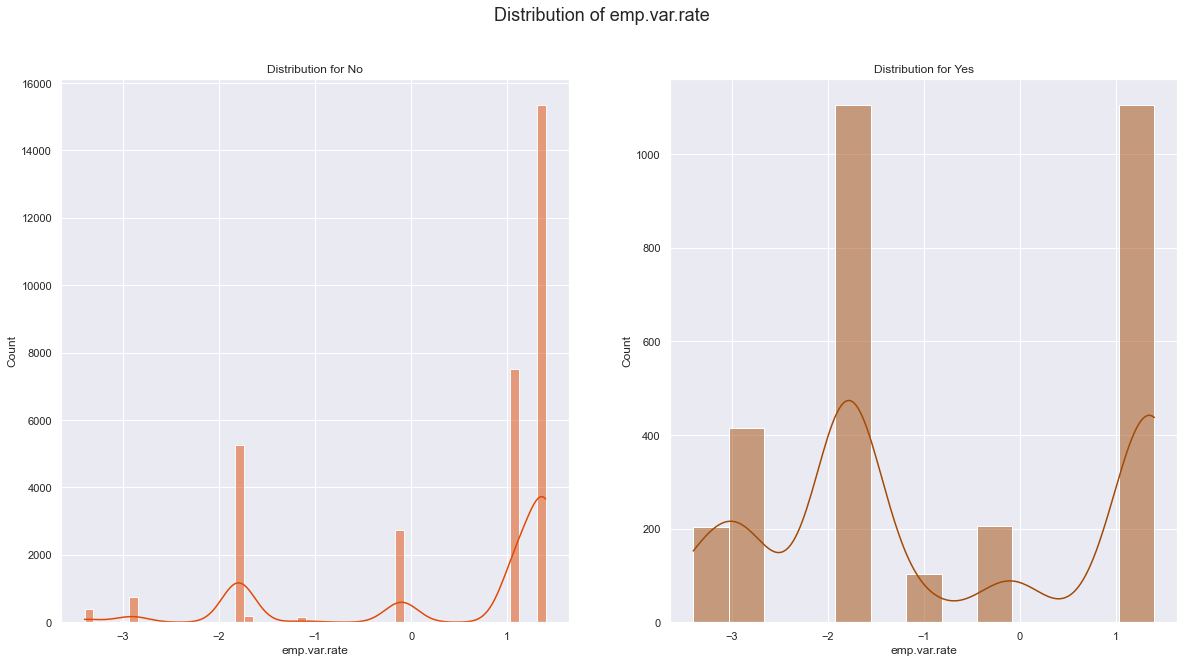

0    32411
1     3140
Name: y, dtype: int64
Proportion of no --> 0.91
Proportion of yes --> 0.09
Correlation with target --> -0.25475240316494974



In [44]:
'''analyse emp.var.rate column'''

col = 'emp.var.rate'

sns.histplot(data[col], kde=True, color='#E14906', bins = 10).set_title('Distribution of {}'.format(col))
plt.show()
print('Number of unique values --> {}'.format(data[col].nunique()))
print('Unique values --> {}'.format(data[col].unique()))
print('Max value --> {}'.format(max(data[col])))
print('Min value --> {}'.format(min(data[col])))
print('Mean value --> {}'.format(round(data[col].mean(),2)))
print("")
print('check correlation to response --> {}'.format(data[col].corr(data['y'])))
print("")

split_plot(data,col, col, bar_label=False)

Observations:

- There is a somewhat high negative correlation.
- This might be due to the fact that when EVR is high, the job market is uncertain and people are less likely to invest in a term deposit. However, correlation does not entail causation.
- The KDE curves are similar in shape for all, no and yes. So EVR might not have a strong influence on the respoonse.

### cons.price.idx

The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by households for a basket of goods and services. It is commonly used as a measure of inflation. (United States Bureau of Labor Statistics (BLS) (2022), "Consumer Price Index", BLS Handbook of Methods, https://www.bls.gov/opub/hom/pdf/homch17.pdf (accessed on 6 March 2023)).

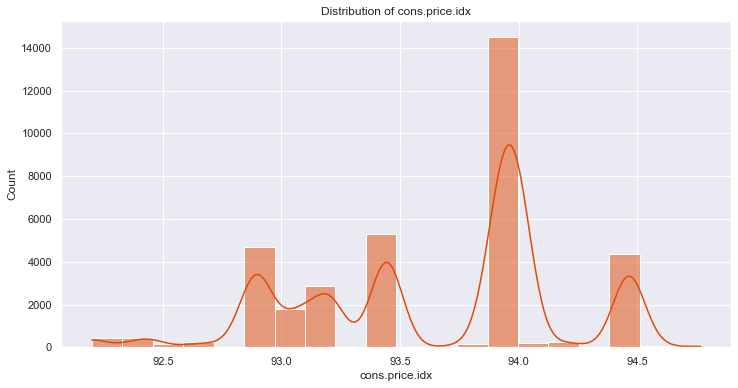

Number of unique values --> 26
Max value --> 94.767
Min value --> 92.201
Mean value --> 93.65

check correlation to response --> -0.15547405388964614



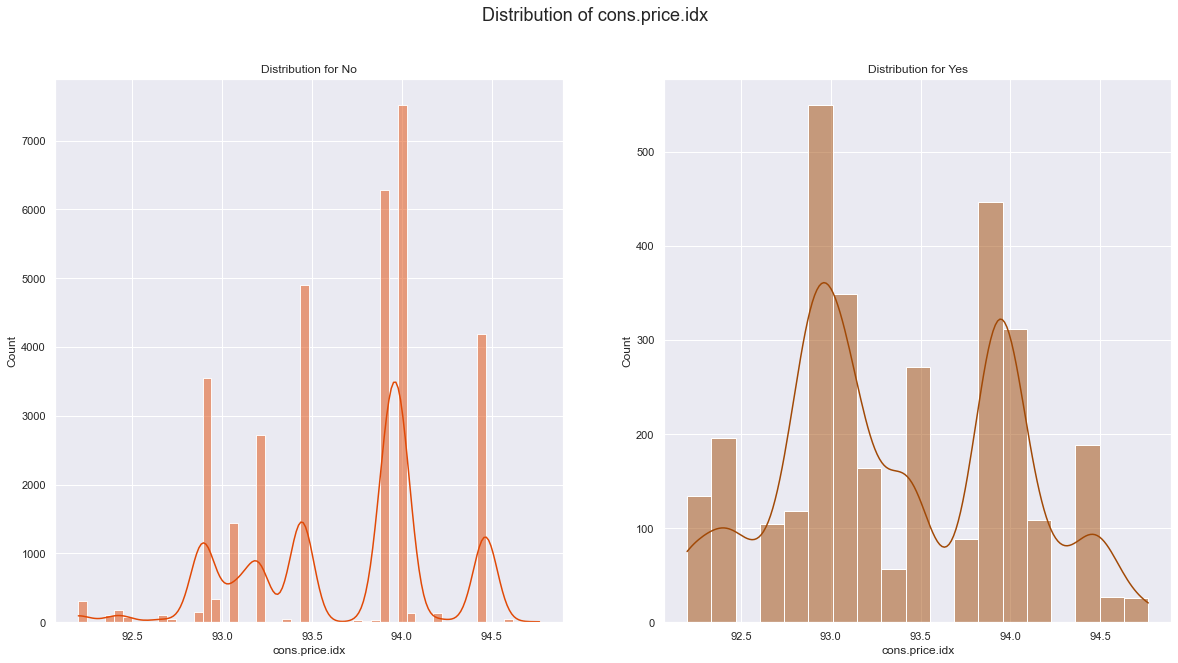

0    32411
1     3140
Name: y, dtype: int64
Proportion of no --> 0.91
Proportion of yes --> 0.09
Correlation with target --> -0.15547405388964614



In [45]:
'''analyse cons.price.idx column'''

col = 'cons.price.idx'

sns.histplot(data[col], kde=True, color='#E14906', bins = 20).set_title('Distribution of {}'.format(col))
plt.show()
print('Number of unique values --> {}'.format(data[col].nunique()))
# print('Unique values --> {}'.format(data[col].unique()))
print('Max value --> {}'.format(max(data[col])))
print('Min value --> {}'.format(min(data[col])))
print('Mean value --> {}'.format(round(data[col].mean(),2)))
print("")
print('check correlation to response --> {}'.format(data[col].corr(data['y'])))
print("")

split_plot(data,col, col, bar_label=False)

### cons.conf.idx

The Consumer Confidence Index (CCI) is a measure of the degree of optimism or pessimism that consumers feel about the state of the economy and their own financial situation. It is a survey-based index that is designed to capture consumers' expectations about the future of the economy and their own financial well-being (The Conference Board (2022), "Consumer Confidence Survey", The Conference Board website, https://www.conference-board.org/data/consumerconfidence.cfm (accessed on 6 March 2023)).

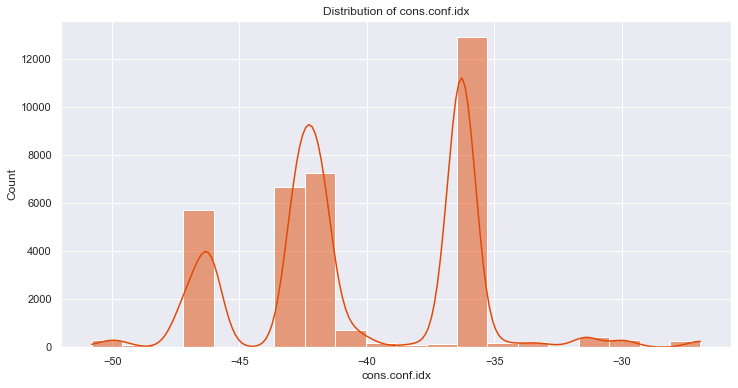

Number of unique values --> 26
Max value --> -26.9
Min value --> -50.8
Mean value --> -40.32

check correlation to response --> -0.01367942125385518



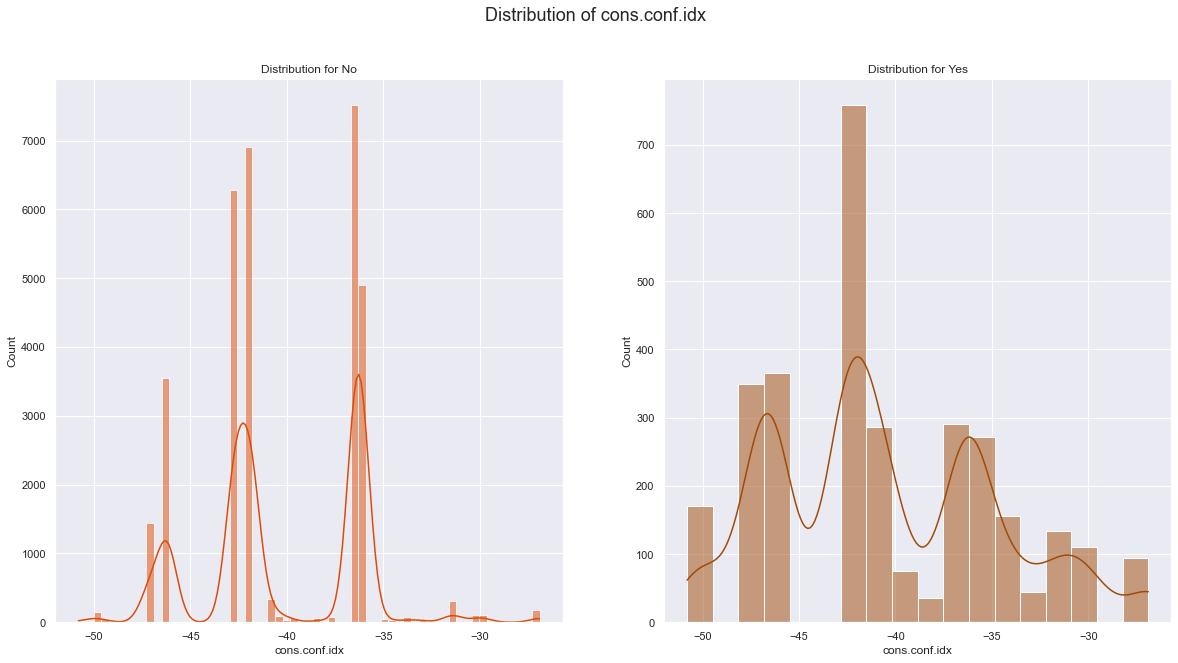

0    32411
1     3140
Name: y, dtype: int64
Proportion of no --> 0.91
Proportion of yes --> 0.09
Correlation with target --> -0.01367942125385518



In [46]:
'''analyse cons.conf.idx column'''

col = 'cons.conf.idx'

sns.histplot(data[col], kde=True, color='#E14906', bins = 20).set_title('Distribution of {}'.format(col))
plt.show()
print('Number of unique values --> {}'.format(data[col].nunique()))
# print('Unique values --> {}'.format(data[col].unique()))
print('Max value --> {}'.format(max(data[col])))
print('Min value --> {}'.format(min(data[col])))
print('Mean value --> {}'.format(round(data[col].mean(),2)))
print("")
print('check correlation to response --> {}'.format(data[col].corr(data['y'])))
print("")

split_plot(data,col, col, bar_label=False)

### euribor3m

EURIBOR 3M is a benchmark interest rate that is widely used in the Eurozone. It is the rate at which banks in the Eurozone lend to each other for a period of three months. The name "EURIBOR" stands for Euro Interbank Offered Rate (European Money Markets Institute (2022), "EURIBOR® 3 Months", European Money Markets Institute website, https://www.emmi-benchmarks.eu/euribor-org/euribor-rates/euribor-3-months.html (accessed on 6 March 2023)).

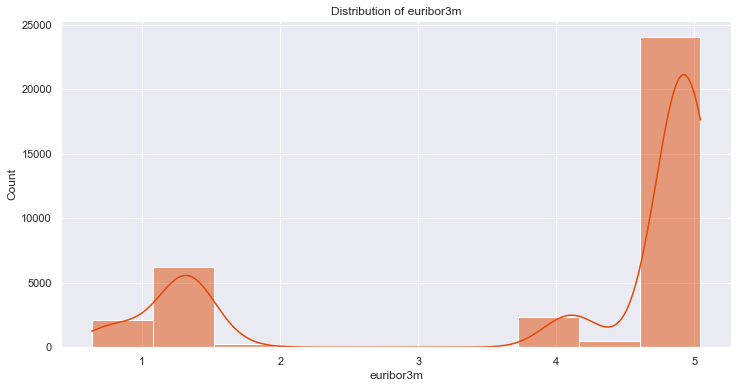

Number of unique values --> 312
Max value --> 5.045
Min value --> 0.634
Mean value --> 3.96

check correlation to response --> -0.25471745923924954



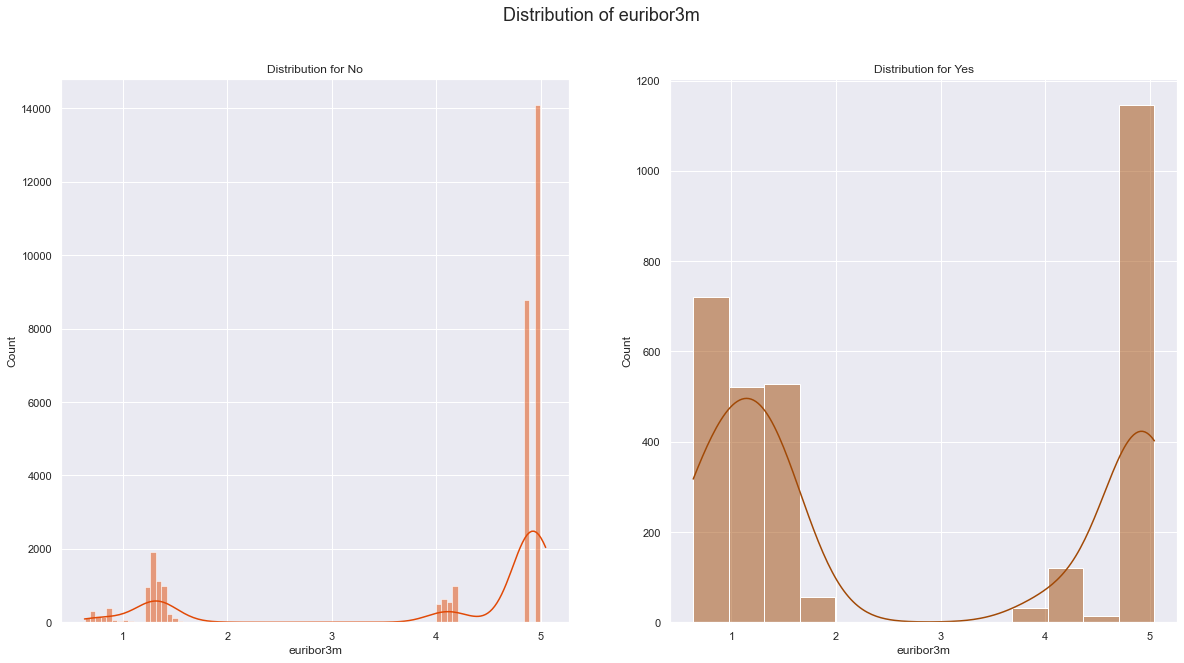

0    32411
1     3140
Name: y, dtype: int64
Proportion of no --> 0.91
Proportion of yes --> 0.09
Correlation with target --> -0.25471745923924954



In [47]:
'''analyse euribor3m column'''

col = 'euribor3m'

sns.histplot(data[col], kde=True, color='#E14906', bins = 10).set_title('Distribution of {}'.format(col))
plt.show()
print('Number of unique values --> {}'.format(data[col].nunique()))
# print('Unique values --> {}'.format(data[col].unique()))
print('Max value --> {}'.format(max(data[col])))
print('Min value --> {}'.format(min(data[col])))
print('Mean value --> {}'.format(round(data[col].mean(),2)))
print("")
print('check correlation to response --> {}'.format(data[col].corr(data['y'])))
print("")

split_plot(data,col, col, bar_label=False)

### nr.employed

"nr.employed" refers to the number of employees - quarterly indicator, which is an economic indicator. It represents the number of employees in the bank at the time the client was contacted during the marketing campaign.

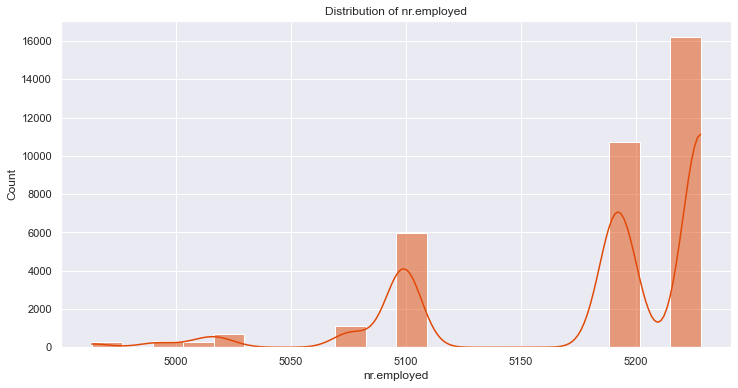

Number of unique values --> 11
Max value --> 5228.1
Min value --> 4963.6
Mean value --> 5181.21

check correlation to response --> -0.2752770050888929



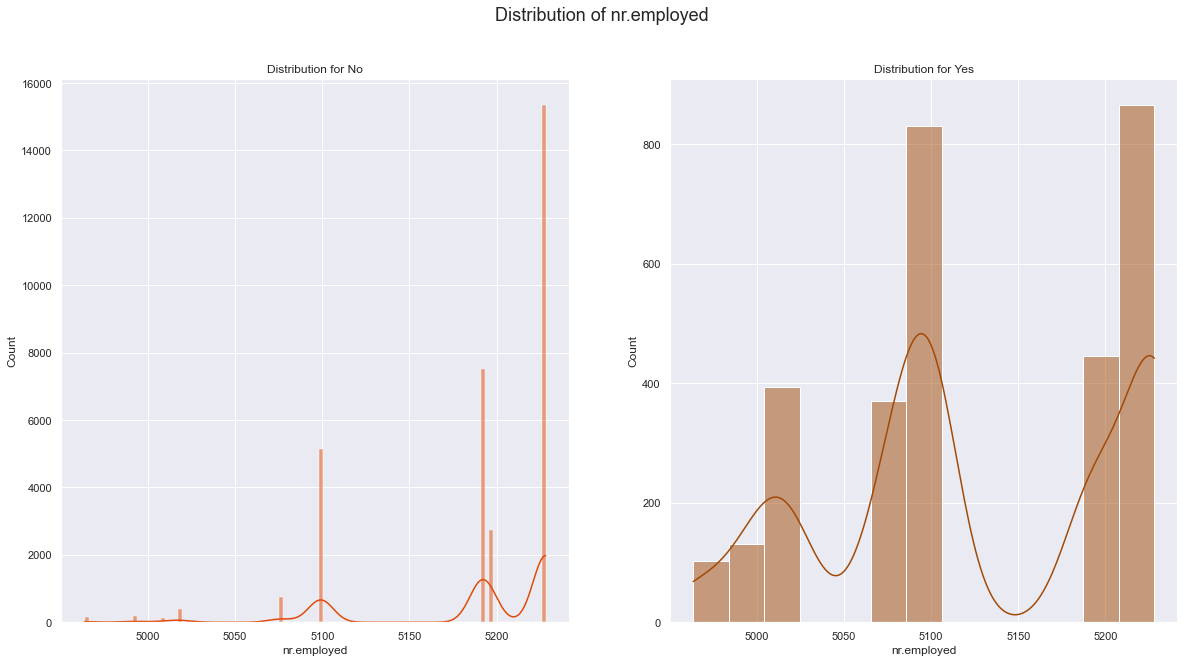

0    32411
1     3140
Name: y, dtype: int64
Proportion of no --> 0.91
Proportion of yes --> 0.09
Correlation with target --> -0.2752770050888929



In [48]:
'''analyse nr.employed column'''

col = 'nr.employed'

sns.histplot(data[col], kde=True, color='#E14906', bins = 20).set_title('Distribution of {}'.format(col))
plt.show()
print('Number of unique values --> {}'.format(data[col].nunique()))
# print('Unique values --> {}'.format(data[col].unique()))
print('Max value --> {}'.format(max(data[col])))
print('Min value --> {}'.format(min(data[col])))
print('Mean value --> {}'.format(round(data[col].mean(),2)))
print("")
print('check correlation to response --> {}'.format(data[col].corr(data['y'])))
print("")

split_plot(data,col, col, bar_label=False)


# Recommendations 

Some recommendations for the bank marketing dataset based on the EDA:

1. Focus on the most promising customer segments: Based on the EDA, it appears that customers who are married, have higher education levels, and have higher balances in their accounts are more likely to subscribe to a term deposit. Therefore, the bank might consider focusing their marketing efforts on these segments.

2. Tailor marketing messages: Use the insights gained from the EDA to develop targeted marketing messages. For example, you might personalise messages to married customers by highlighting the benefits of saving for the future, or use language that emphasises the value of a term deposit to customers with higher education levels.

3. Optimise the timing and frequency of your campaigns: Based on the EDA, it appears that the months of March, September, October, and December have the highest number of successful term deposit subscriptions. The bank might consider increasing the frequency of their campaigns during these months and reducing the effort during other times of the year. Additionally, it might be helpful to analyse the factors that contribute to higher success rates during these months (e.g., seasonal trends, holidays, etc.) and adjust the messaging and targeting accordingly.

4. Experiment with different channels and formats: Based on the EDA, it appears that phone and cellular marketing are the most effective channels for reaching customers, while social media and email are less effective. They might consider experimenting with different formats within these channels to see which are most effective at engaging the target audience.

5. Measure and track results: Use analytics tools to measure the effectiveness of your marketing campaigns and track key metrics such as conversion rates, customer lifetime value, and ROI. This will help you to continually refine your approach and maximize your marketing success.

6. Offer incentives to encourage customers to subscribe: Based on the EDA, customers who have subscribed to a term deposit in the past are more likely to do so again. To encourage more customers to subscribe, the bank might consider offering incentives such as a higher interest rate or a cash bonus for customers who open a new term deposit account. Additionally, they might consider offering loyalty rewards to customers who maintain a term deposit account for a certain length of time, which could encourage them to continue their subscription and potentially refer others to the bank.